# Insurance Claim Fraud Detection Project
# Phase 4 project by Nikita Kumari
### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Independent Variables
1. months_as_customer: Number of months of patronage
2. age: the length of time a customer has lived or a thing has existed
3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6. policy_csl: is basically Combined Single Limit
7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10. insured_zip: It is the zip code where the insurance was made
11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12. insured_education_level: This refers to the Level of education of the customer
13. insured_occupation: This refers Occupation of the customer
14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15. insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16. capital-gains: This refers to profit accrued due to insurance premium
17. capital-loss: This refers to the losses incurred due to insurance claims
18. incident_date: This refers to the date which claims where made by customers
19. incident_type: This refers to the type of claim/vehicle damage made by customer
20. collision_type: This refers to the area of damage on the vehicle
21. incident_severity: This refers to the extent/level of damage
22. authorities_contacted: This refers to the government agencies that were contacted after damage
23. incident_state: This refers to the state at which the accident happened
24. incident_city: This refers to the city at which the accident happened
25. 1ncident_location: This refers to the location at which the accident happened
26. incident_hour_of_the_day: The period of the day which accident took place
27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
28. property_damage: This refers to whether property was damaged or not
29. bodily_injuries: This refers to injuries sustained
30. witnesses: This refers to the number of witnesses involved
31. police_report_available: This refers to whether the report on damage was documented or not
32. total_claim_amount: This refers to the financial implications involved in claims
33. injury_claim: This refers to physical injuries sustained
34. property_claim: This refers to property damages during incident
35. vehicle_claim: This refers to property damages during incident
36. auto_make: This refers to the make of the vehicle
37. auto_model: This refers to the model of the vehicle
38. auto_year: This refers to the year which the vehicle was manufactured
39. _c39:
40. fraud_reported

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  \
0    228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000   
1    134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000   
2    256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000   
3    228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000   
4    256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0   
..   ...  ..     ...         ...  ..       ...   ...      ...      ...   
994    3  38  941851  16-07-1991  OH  500/1000  1000  1310.80        0   
995  285  41  186934  05-01-2014  IL   100/300  1000  1436.79        0   
996  130  34  918516  17-02-2003  OH   250/500   500  1383.49  3000000   
997  458  62  533940  18-11-2011  IL  500/1000  2000  1356.92  5000000   
998  456  60  556080  11-11-1996  OH   250/500  1000   766.19        0   

     466132  ...  2 YES.1   71610   6510  13020  52080        Saab      92x  \
0    468176  ...  0     ?    5070    780    780   3510    Mercedes     E400   
1    430632  ...  3    NO   34650   7700   3850  23100       Dodge      RAM   
2    608117  ...  2    NO   63400   6340   6340  50720   Chevrolet    Tahoe   
3    610706  ...  1    NO    6500   1300    650   4550      Accura      RSX   
4    478456  ...  2    NO   64100   6410   6410  51280        Saab       95   
..      ...  ... ..   ...     ...    ...    ...    ...         ...      ...   
994  431289  ...  1     ?   87200  17440   8720  61040       Honda   Accord   
995  608177  ...  3     ?  108480  18080  18080  72320  Volkswagen   Passat   
996  442797  ...  3   YES   67500   7500   7500  52500      Suburu  Impreza   
997  441714  ...  1   YES   46980   5220   5220  36540        Audi       A5   
998  612260  ...  3     ?    5060    460    920   3680    Mercedes     E400   

     2004  Y  
0    2007  Y  
1    2007  N  
2    2014  Y  
3    2009  N  
4    2003  Y  
..    ... ..  
994  2006  N  
995  2015  N  
996  1996  N  
997  1998  N  
998  2007  N  

[999 rows x 39 columns]

##### As noticeable that there are no column names and instead the first entry has been taken as the column titles so we fix it

In [24]:
original_columns = list(df.columns)

new_columns = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']

df.columns = new_columns

original_columns_df = pd.DataFrame([original_columns], columns=new_columns)

# Concatenate the original_columns_df with df
df = pd.concat([original_columns_df, df], ignore_index=True)


In [25]:
df

months_as_customer age policy_number policy_bind_date policy_state  \
0                  328  48        521585       17-10-2014           OH   
1                  228  42        342868       27-06-2006           IN   
2                  134  29        687698       06-09-2000           OH   
3                  256  41        227811       25-05-1990           IL   
4                  228  44        367455       06-06-2014           IL   
..                 ...  ..           ...              ...          ...   
995                  3  38        941851       16-07-1991           OH   
996                285  41        186934       05-01-2014           IL   
997                130  34        918516       17-02-2003           OH   
998                458  62        533940       18-11-2011           IL   
999                456  60        556080       11-11-1996           OH   

    policy_csl policy_deductable policy_annual_premium umbrella_limit  \
0      250/500              1000               1406.91              0   
1      250/500              2000               1197.22        5000000   
2      100/300              2000               1413.14        5000000   
3      250/500              2000               1415.74        6000000   
4     500/1000              1000               1583.91        6000000   
..         ...               ...                   ...            ...   
995   500/1000              1000                1310.8              0   
996    100/300              1000               1436.79              0   
997    250/500               500               1383.49        3000000   
998   500/1000              2000               1356.92        5000000   
999    250/500              1000                766.19              0   

    insured_zip  ... witnesses police_report_available total_claim_amount  \
0        466132  ...         2                   YES.1              71610   
1        468176  ...         0                       ?               5070   
2        430632  ...         3                      NO              34650   
3        608117  ...         2                      NO              63400   
4        610706  ...         1                      NO               6500   
..          ...  ...       ...                     ...                ...   
995      431289  ...         1                       ?              87200   
996      608177  ...         3                       ?             108480   
997      442797  ...         3                     YES              67500   
998      441714  ...         1                     YES              46980   
999      612260  ...         3                       ?               5060   

    injury_claim property_claim vehicle_claim   auto_make auto_model  \
0           6510          13020         52080        Saab        92x   
1            780            780          3510    Mercedes       E400   
2           7700           3850         23100       Dodge        RAM   
3           6340           6340         50720   Chevrolet      Tahoe   
4           1300            650          4550      Accura        RSX   
..           ...            ...           ...         ...        ...   
995        17440           8720         61040       Honda     Accord   
996        18080          18080         72320  Volkswagen     Passat   
997         7500           7500         52500      Suburu    Impreza   
998         5220           5220         36540        Audi         A5   
999          460            920          3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[1000 rows x 39 columns]

In [26]:
df.head(10)

months_as_customer age policy_number policy_bind_date policy_state  \
0                328  48        521585       17-10-2014           OH   
1                228  42        342868       27-06-2006           IN   
2                134  29        687698       06-09-2000           OH   
3                256  41        227811       25-05-1990           IL   
4                228  44        367455       06-06-2014           IL   
5                256  39        104594       12-10-2006           OH   
6                137  34        413978       04-06-2000           IN   
7                165  37        429027       03-02-1990           IL   
8                 27  33        485665       05-02-1997           IL   
9                212  42        636550       25-07-2011           IL   

  policy_csl policy_deductable policy_annual_premium umbrella_limit  \
0    250/500              1000               1406.91              0   
1    250/500              2000               1197.22        5000000   
2    100/300              2000               1413.14        5000000   
3    250/500              2000               1415.74        6000000   
4   500/1000              1000               1583.91        6000000   
5    250/500              1000                1351.1              0   
6    250/500              1000               1333.35              0   
7    100/300              1000               1137.03              0   
8    100/300               500               1442.99              0   
9    100/300               500               1315.68              0   

  insured_zip  ... witnesses police_report_available total_claim_amount  \
0      466132  ...         2                   YES.1              71610   
1      468176  ...         0                       ?               5070   
2      430632  ...         3                      NO              34650   
3      608117  ...         2                      NO              63400   
4      610706  ...         1                      NO               6500   
5      478456  ...         2                      NO              64100   
6      441716  ...         0                       ?              78650   
7      603195  ...         2                     YES              51590   
8      601734  ...         1                     YES              27700   
9      600983  ...         1                       ?              42300   

  injury_claim property_claim vehicle_claim  auto_make  auto_model auto_year  \
0         6510          13020         52080       Saab         92x      2004   
1          780            780          3510   Mercedes        E400      2007   
2         7700           3850         23100      Dodge         RAM      2007   
3         6340           6340         50720  Chevrolet       Tahoe      2014   
4         1300            650          4550     Accura         RSX      2009   
5         6410           6410         51280       Saab          95      2003   
6        21450           7150         50050     Nissan  Pathfinder      2012   
7         9380           9380         32830       Audi          A5      2015   
8         2770           2770         22160     Toyota       Camry      2012   
9         4700           4700         32900       Saab         92x      1996   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  
5              Y  
6              N  
7              N  
8              N  
9              N  

[10 rows x 39 columns]

In [27]:
df.tail(10)

months_as_customer age policy_number policy_bind_date policy_state  \
990                286  43        663190       05-02-1994           IL   
991                257  44        109392       12-07-2006           OH   
992                 94  26        215278       24-10-2007           IN   
993                124  28        674570       08-12-2001           OH   
994                141  30        681486       24-03-2007           IN   
995                  3  38        941851       16-07-1991           OH   
996                285  41        186934       05-01-2014           IL   
997                130  34        918516       17-02-2003           OH   
998                458  62        533940       18-11-2011           IL   
999                456  60        556080       11-11-1996           OH   

    policy_csl policy_deductable policy_annual_premium umbrella_limit  \
990    100/300               500               1564.43        3000000   
991    100/300              1000               1280.88              0   
992    100/300               500                722.66              0   
993    250/500              1000               1235.14              0   
994   500/1000              1000               1347.04              0   
995   500/1000              1000                1310.8              0   
996    100/300              1000               1436.79              0   
997    250/500               500               1383.49        3000000   
998   500/1000              2000               1356.92        5000000   
999    250/500              1000                766.19              0   

    insured_zip  ... witnesses police_report_available total_claim_amount  \
990      477644  ...         2                     YES              34290   
991      433981  ...         1                      NO              46980   
992      433696  ...         2                     YES              36700   
993      443567  ...         1                       ?              60200   
994      430665  ...         2                     YES               6480   
995      431289  ...         1                       ?              87200   
996      608177  ...         3                       ?             108480   
997      442797  ...         3                     YES              67500   
998      441714  ...         1                     YES              46980   
999      612260  ...         3                       ?               5060   

    injury_claim property_claim vehicle_claim   auto_make      auto_model  \
990         3810           3810         26670        Jeep  Grand Cherokee   
991            0           5220         41760      Accura              TL   
992         3670           7340         25690      Nissan      Pathfinder   
993         6020           6020         48160  Volkswagen          Passat   
994          540           1080          4860       Honda           Civic   
995        17440           8720         61040       Honda          Accord   
996        18080          18080         72320  Volkswagen          Passat   
997         7500           7500         52500      Suburu         Impreza   
998         5220           5220         36540        Audi              A5   
999          460            920          3680    Mercedes            E400   

    auto_year fraud_reported  
990      2013              N  
991      2002              N  
992      2010              N  
993      2012              N  
994      1996              N  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[10 rows x 39 columns]

In [28]:
df.sample(10)

months_as_customer age policy_number policy_bind_date policy_state  \
393                406  58        756981       02-10-2003           OH   
689                 26  42        287436       11-09-2010           OH   
808                135  34        824116       05-05-1998           IL   
486                128  29        743330       04-11-2010           OH   
701                162  33        790225       05-01-1991           OH   
21                 217  41        431876       27-11-2005           IL   
262                232  43        751905       16-05-2001           OH   
911                 98  26        727109       20-02-2001           IN   
614                131  33        432740       09-10-1990           IL   
365                162  31        386690       21-02-2006           IN   

    policy_csl policy_deductable policy_annual_premium umbrella_limit  \
393    250/500              2000               1117.04              0   
689    100/300              1000               1484.48              0   
808    250/500              2000               1687.53              0   
486   500/1000              1000               1878.44              0   
701    250/500               500                964.92              0   
21    500/1000              2000                875.15              0   
262    250/500               500               1483.91        8000000   
911   500/1000              2000                1082.1              0   
614    100/300              2000               1081.17              0   
365    100/300              1000               1050.24              0   

    insured_zip  ... witnesses police_report_available total_claim_amount  \
393      605121  ...         2                       ?              65520   
689      613849  ...         3                       ?              63030   
808      465674  ...         2                      NO              78200   
486      450746  ...         0                       ?              59070   
701      601581  ...         1                      NO              35300   
21       442479  ...         2                       ?              37840   
262      431531  ...         1                       ?              70600   
911      477268  ...         1                     YES              65430   
614      445120  ...         1                      NO               4900   
365      456789  ...         0                      NO               3600   

    injury_claim property_claim vehicle_claim   auto_make auto_model  \
393        10920           5460         49140  Volkswagen      Jetta   
689         5730          11460         45840        Saab        92x   
808        15640           7820         54740        Audi         A3   
486         5370           5370         48330   Chevrolet     Malibu   
701         3530           3530         28240    Mercedes       E400   
21             0           4730         33110      Accura        RSX   
262         7060          14120         49420  Volkswagen     Passat   
911        14540           7270         43620        Jeep   Wrangler   
614          490            490          3920      Toyota      Camry   
365          360            720          2520         BMW         X5   

    auto_year fraud_reported  
393      2009              N  
689      1996              N  
808      2009              N  
486      2003              N  
701      1996              Y  
21       1996              N  
262      2013              Y  
911      2001              N  
614      2010              N  
365      2013              Y  

[10 rows x 39 columns]

## EDA (Exploratory data analysis)

In [29]:
df.shape

(1000, 39)

There is 1000 rows and 39 columns

In [30]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [31]:
df.dtypes

months_as_customer             object
age                            object
policy_number                  object
policy_bind_date               object
policy_state                   object
policy_csl                     object
policy_deductable              object
policy_annual_premium          object
umbrella_limit                 object
insured_zip                    object
insured_sex                    object
insured_education_level        object
insured_occupation             object
insured_hobbies                object
insured_relationship           object
capital-gains                  object
capital-loss                   object
incident_date                  object
incident_type                  object
collision_type                 object
incident_severity              object
authorities_contacted          object
incident_state                 object
incident_city                  object
incident_location              object
incident_hour_of_the_day       object
number_of_ve

As per above information we can see that our dataset columns has been converted to object values as we altered the columns.

We will need to treat the object datatype columns so that our machine learning model can understand the data

In [33]:

df['months_as_customer'] = df['months_as_customer'].astype(float)
df['age'] = df['age'].astype(float)
df['policy_number'] = df['policy_number'].astype(float)
df['policy_deductable'] = df['policy_deductable'].astype(float)
df['umbrella_limit'] = df['umbrella_limit'].astype(float)
df['insured_zip'] = df['insured_zip'].astype(float)
df['capital-gains'] = df['capital-gains'].astype(float)
df['capital-loss'] = df['capital-loss'].astype(float)
df['incident_hour_of_the_day'] = df['incident_hour_of_the_day'].astype(float)
df['number_of_vehicles_involved'] = df['number_of_vehicles_involved'].astype(float)
df['bodily_injuries'] = df['bodily_injuries'].astype(float)
df['witnesses'] = df['witnesses'].astype(float)
df['total_claim_amount'] = df['total_claim_amount'].astype(float)
df['injury_claim'] = df['injury_claim'].astype(float)
df['property_claim'] = df['property_claim'].astype(float)
df['vehicle_claim'] = df['vehicle_claim'].astype(float)
df['auto_year'] = df['auto_year'].astype(float)

In [34]:
df.dtypes

months_as_customer             float64
age                            float64
policy_number                  float64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable              float64
policy_annual_premium           object
umbrella_limit                 float64
insured_zip                    float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                  float64
capital-loss                   float64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [35]:
# Lets check number of unique values of each columns:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    355
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [36]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


In [37]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}:')
    print(unique_values)
    print('\n')

Unique values for months_as_customer:
[328. 228. 134. 256. 137. 165.  27. 212. 235. 447.  60. 121. 180. 473.
  70. 140. 160. 196. 460. 217. 370. 413. 237.   8. 257. 202. 224. 241.
  64. 166. 155. 114. 149. 147.  62. 289. 431. 199.  79. 116.  37. 106.
 269. 265. 163. 355. 175. 192. 430.  91. 223. 195.  22. 439.  94.  11.
 151. 154. 245. 119. 215. 295. 254. 107. 478. 128. 338. 271. 222. 120.
 270. 319. 194. 227. 244.  78. 200. 284. 275. 153.  31.  41. 127.  61.
 207. 219.  80. 325.  29. 239. 279. 350. 464. 118. 298.  87. 261. 453.
 210. 168. 390. 258. 225. 164. 255. 206. 203. 211. 274.  81. 280. 112.
  24.  93. 171. 124. 287. 122. 398. 214. 209.  82. 193. 288. 104. 101.
 375. 461. 428.  45. 136. 216. 278. 108.  14. 276.  47.  73. 294. 324.
  53. 426. 111.  86. 296. 125. 177. 238. 449. 252. 359.  19. 285.  30.
 342. 468. 343. 404.  63. 335. 142. 272.  69.  38. 281. 246. 330. 362.
 371. 377. 172.  99. 249. 190. 174.  95.   2. 117. 242. 440.  20. 208.
 156. 232.  84. 394.  35. 369. 332. 243

In [38]:
# Lets us check the information and count of dtypes in the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   float64
 1   age                          1000 non-null   float64
 2   policy_number                1000 non-null   float64
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   float64
 7   policy_annual_premium        1000 non-null   object 
 8   umbrella_limit               1000 non-null   float64
 9   insured_zip                  1000 non-null   float64
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that our dataset is having 21 object datatypes and 18 numerical datatypes

## Let us seperate the numerical and object datatypes

In [39]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)

numerical_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_datatype.append(i)

In [40]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    355
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [41]:
# Droping unwanted columns
columns_to_drop = ['incident_location', 'policy_number']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

## Checking Null

In [42]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_am

<Axes: >

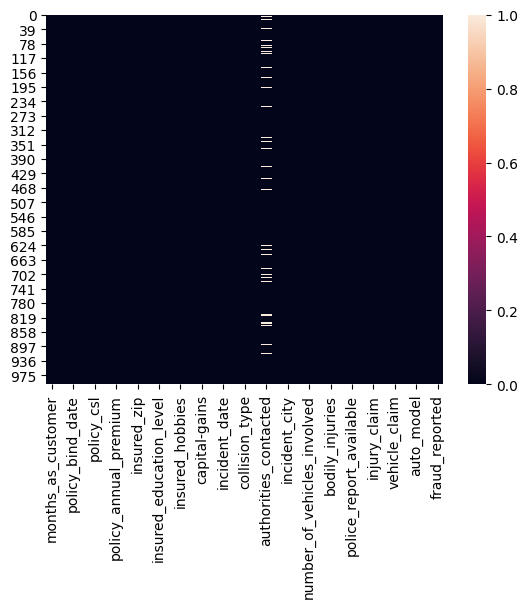

In [43]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

In [44]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

<Axes: >

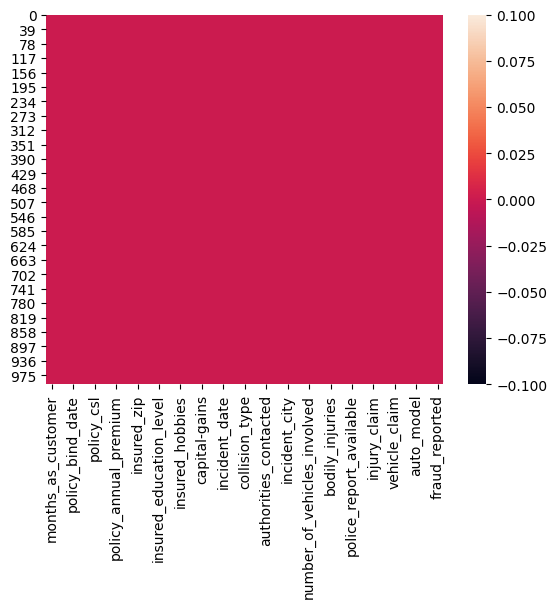

In [45]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

In [46]:
# Let us check the value counts of dataset:

for columns in df:
    print(columns)
    print(df[columns].value_counts())
    print("__"*12)

months_as_customer
months_as_customer
194.0    8
128.0    7
254.0    7
140.0    7
210.0    7
        ..
390.0    1
411.0    1
453.0    1
448.0    1
17.0     1
Name: count, Length: 391, dtype: int64
________________________
age
age
43.0    49
39.0    48
41.0    45
34.0    44
38.0    42
30.0    42
31.0    42
37.0    41
33.0    39
40.0    38
32.0    38
29.0    35
46.0    33
42.0    32
35.0    32
36.0    32
44.0    32
28.0    30
26.0    26
45.0    26
48.0    25
47.0    24
27.0    24
57.0    16
25.0    14
55.0    14
49.0    14
53.0    13
50.0    13
24.0    10
54.0    10
61.0    10
51.0     9
60.0     9
58.0     8
56.0     8
23.0     7
21.0     6
59.0     5
62.0     4
52.0     4
64.0     2
63.0     2
19.0     1
20.0     1
22.0     1
Name: count, dtype: int64
________________________
policy_bind_date
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Na

In [47]:
df.describe().T

count          mean           std        min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.0   
age                          1000.0  3.894800e+01  9.140287e+00       19.0   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.0   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.0   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.0   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.0   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.0   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.0   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.0   
bodily_injuries              1000.0  9.921000e-01  8.201343e-01        0.0   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.0   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.0   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.0   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.0   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.0   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.0   

                                   25%       50%        75%         max  
months_as_customer              115.75     199.5     276.25       479.0  
age                              32.00      38.0      44.00        64.0  
policy_deductable               500.00    1000.0    2000.00      2000.0  
umbrella_limit                    0.00       0.0       0.00  10000000.0  
insured_zip                  448404.50  466445.5  603251.00    620962.0  
capital-gains                     0.00       0.0   51025.00    100500.0  
capital-loss                 -51500.00  -23250.0       0.00         0.1  
incident_hour_of_the_day          6.00      12.0      17.00        23.0  
number_of_vehicles_involved       1.00       1.0       3.00         4.0  
bodily_injuries                   0.00       1.0       2.00         2.0  
witnesses                         1.00       1.0       2.00         3.0  
total_claim_amount            41812.50   58055.0   70592.50    114920.0  
injury_claim                   4295.00    6775.0   11305.00     21450.0  
property_claim                 4445.00    6750.0   10885.00     23670.0  
vehicle_claim                 30292.50   42100.0   50822.50     79560.0  
auto_year                      2000.00    2005.0    2010.00      2015.0

In [48]:
# Lets check all the statistical data
df.describe(include="all").T

count unique                      top freq  \
months_as_customer           1000.0    NaN                      NaN  NaN   
age                          1000.0    NaN                      NaN  NaN   
policy_bind_date               1000    951               01-01-2006    3   
policy_state                   1000      3                       OH  352   
policy_csl                     1000      3                  250/500  351   
policy_deductable            1000.0    NaN                      NaN  NaN   
policy_annual_premium        1000.0  991.0                  1558.29  2.0   
umbrella_limit               1000.0    NaN                      NaN  NaN   
insured_zip                  1000.0    NaN                      NaN  NaN   
insured_sex                    1000      2                   FEMALE  537   
insured_education_level        1000      7                       JD  161   
insured_occupation             1000     14        machine-op-inspct   93   
insured_hobbies                1000     20                  reading   64   
insured_relationship           1000      6                own-child  183   
capital-gains                1000.0    NaN                      NaN  NaN   
capital-loss                 1000.0    NaN                      NaN  NaN   
incident_date                  1000     60               02-02-2015   28   
incident_type                  1000      4  Multi-vehicle Collision  419   
collision_type                 1000      4           Rear Collision  292   
incident_severity              1000      4             Minor Damage  354   
authorities_contacted          1000      4                   Police  383   
incident_state                 1000      7                       NY  262   
incident_city                  1000      7              Springfield  157   
incident_hour_of_the_day     1000.0    NaN                      NaN  NaN   
number_of_vehicles_involved  1000.0    NaN                      NaN  NaN   
property_damage                1000      3                        ?  360   
bodily_injuries              1000.0    NaN                      NaN  NaN   
witnesses                    1000.0    NaN                      NaN  NaN   
police_report_available        1000      4                        ?  343   
total_claim_amount           1000.0    NaN                      NaN  NaN   
injury_claim                 1000.0    NaN                      NaN  NaN   
property_claim               1000.0    NaN                      NaN  NaN   
vehicle_claim                1000.0    NaN                      NaN  NaN   
auto_make                      1000     14                     Saab   80   
auto_model                     1000     39                      RAM   43   
auto_year                    1000.0    NaN                      NaN  NaN   
fraud_reported                 1000      2                        N  753   

                                   mean             std        min       25%  \
months_as_customer              203.954      115.113174        0.0    115.75   
age                              38.948        9.140287       19.0      32.0   
policy_bind_date                    NaN             NaN        NaN       NaN   
policy_state                        NaN             NaN        NaN       NaN   
policy_csl                          NaN             NaN        NaN       NaN   
policy_deductable                1136.0      611.864673      500.0     500.0   
policy_annual_premium               NaN             NaN        NaN       NaN   
umbrella_limit                1101000.0  2297406.598118 -1000000.0       0.0   
insured_zip                  501214.488    71701.610941   430104.0  448404.5   
insured_sex                         NaN             NaN        NaN       NaN   
insured_education_level             NaN             NaN        NaN       NaN   
insured_occupation                  NaN             NaN        NaN       NaN   
insured_hobbies                     NaN             NaN        NaN       NaN   
insured_relationship 

Now we are able to see all the data columns in vertical and statistical columns in horizontal.

In this dataset we have the details of an automobile insurance policy along with the customer details. It also has the details of the accident on the basis of which the insurance claims have been made.

## Data Pre-Processing

In [49]:
# Firstly lets convert the dates of 'policy_bind_date' and 'incident_date' seperately to day-month-year.

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [50]:
# dropping the original Date columns after separating the required outputs
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In [51]:
# Now as we have seen previously that some of the columns had '?' as its data, so now lets replace this data with some useful input data:

df['collision_type'] = df['collision_type'].replace('?', 'No idea')
df['property_damage'] = df['property_damage'].replace('?', 'No idea')
df['police_report_available'] = df['police_report_available'].replace('?', 'No idea')

In [52]:
df.sample(10)

months_as_customer   age policy_state policy_csl  policy_deductable  \
946                31.0  32.0           IL    100/300             2000.0   
735               293.0  45.0           IL    100/300             1000.0   
355               256.0  43.0           OH    100/300              500.0   
165               108.0  29.0           IN   500/1000             1000.0   
591                43.0  43.0           IL   500/1000              500.0   
371               273.0  41.0           OH   500/1000             1000.0   
623               206.0  42.0           IL   500/1000             1000.0   
473               300.0  49.0           IL    100/300             1000.0   
823               197.0  41.0           OH   500/1000             1000.0   
347               257.0  43.0           IN   500/1000             2000.0   

    policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
946               1263.48       4000000.0     442948.0      FEMALE   
735               1119.23             0.0     447560.0      FEMALE   
355               1203.17             0.0     455810.0      FEMALE   
165               1337.92             0.0     441536.0      FEMALE   
591               1320.39             0.0     604861.0      FEMALE   
371                1403.9             0.0     449793.0      FEMALE   
623               1230.76             0.0     470488.0        MALE   
473               1441.21             0.0     609322.0      FEMALE   
823               1324.78             0.0     478640.0      FEMALE   
347                 929.7       6000000.0     618632.0      FEMALE   

    insured_education_level  ...   auto_make auto_model auto_year  \
946                      JD  ...        Audi         A5    1997.0   
735                      MD  ...        Jeep   Wrangler    2015.0   
355                      MD  ...      Nissan     Ultima    1997.0   
165                     PhD  ...      Suburu     Legacy    2012.0   
591               Associate  ...       Honda        CRV    1996.0   
371                     PhD  ...       Honda     Accord    2015.0   
623             High School  ...        Saab        92x    1997.0   
473                     PhD  ...      Nissan     Maxima    2001.0   
823                     PhD  ...  Volkswagen      Jetta    1997.0   
347                     PhD  ...    Mercedes       E400    2005.0   

     fraud_reported  policy_bind_Day policy_bind_Month policy_bind_Year  \
946               Y                7                 9             1999   
735               N               28                 4             1992   
355               N               13                12             2014   
165               N                4                12             2007   
591               Y                7                11             1997   
371               N               17                 2             2010   
623               Y               10                10             1993   
473               N               17                12             1995   
823               Y               27                 6             1996   
347               N               18                 2             1999   

    incident_Day incident_Month incident_Year  
946            7              2          2015  
735           18              2          2015  
355            6              2          2015  
165           23              2          2015  
591           19              1          2015  
371           31              1          2015  
623            3              1          2015  
473            4              1          2015  
823           10              1          2015  
347           14              1          2015  

[10 rows x 41 columns]

## Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

months_as_customer   age policy_state policy_csl  policy_deductable  \
0               328.0  48.0           OH    250/500             1000.0   
1               228.0  42.0           IN    250/500             2000.0   
2               134.0  29.0           OH    100/300             2000.0   
3               256.0  41.0           IL    250/500             2000.0   
4               228.0  44.0           IL   500/1000             1000.0   

  policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0               1406.91             0.0     466132.0        MALE   
1               1197.22       5000000.0     468176.0        MALE   
2               1413.14       5000000.0     430632.0      FEMALE   
3               1415.74       6000000.0     608117.0      FEMALE   
4               1583.91       6000000.0     610706.0        MALE   

  insured_education_level  ...  auto_make auto_model auto_year  \
0                      MD  ...       Saab        92x    2004.0   
1                      MD  ...   Mercedes       E400    2007.0   
2                     PhD  ...      Dodge        RAM    2007.0   
3                     PhD  ...  Chevrolet      Tahoe    2014.0   
4               Associate  ...     Accura        RSX    2009.0   

   fraud_reported  policy_bind_Day policy_bind_Month policy_bind_Year  \
0               1               17                10             2014   
1               1               27                 6             2006   
2               0                6                 9             2000   
3               1               25                 5             1990   
4               0                6                 6             2014   

  incident_Day incident_Month incident_Year  
0           25              1          2015  
1           21              1          2015  
2           22              2          2015  
3           10              1          2015  
4           17              2          2015  

[5 rows x 41 columns]

In [54]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['policy_state',
 'policy_csl',
 'policy_annual_premium',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [56]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
def ordinal_encoder(df, column):
    df[column] = df[column].astype(str)
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encoder(df, object_datatype)
df.head()

months_as_customer   age  policy_state  policy_csl  policy_deductable  \
0               328.0  48.0           2.0         1.0             1000.0   
1               228.0  42.0           1.0         1.0             2000.0   
2               134.0  29.0           2.0         0.0             2000.0   
3               256.0  41.0           0.0         1.0             2000.0   
4               228.0  44.0           0.0         2.0             1000.0   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  579.0             0.0     466132.0          1.0   
1                  243.0       5000000.0     468176.0          1.0   
2                  587.0       5000000.0     430632.0          0.0   
3                  590.0       6000000.0     608117.0          0.0   
4                  749.0       6000000.0     610706.0          1.0   

   insured_education_level  ...  auto_make  auto_model  auto_year  \
0                      4.0  ...       10.0         1.0     2004.0   
1                      4.0  ...        8.0        12.0     2007.0   
2                      6.0  ...        4.0        30.0     2007.0   
3                      6.0  ...        3.0        34.0     2014.0   
4                      0.0  ...        0.0        31.0     2009.0   

   fraud_reported  policy_bind_Day  policy_bind_Month  policy_bind_Year  \
0               1               17                 10              2014   
1               1               27                  6              2006   
2               0                6                  9              2000   
3               1               25                  5              1990   
4               0                6                  6              2014   

   incident_Day  incident_Month  incident_Year  
0            25               1           2015  
1            21               1           2015  
2            22               2           2015  
3            10               1           2015  
4            17               2           2015  

[5 rows x 41 columns]

## Checking Outliers

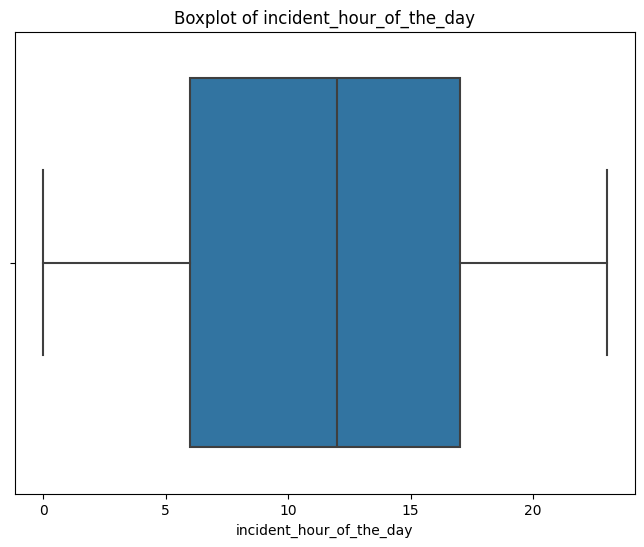

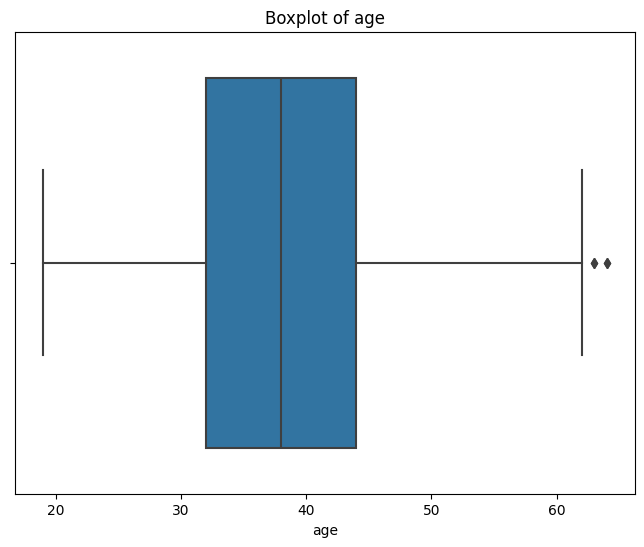

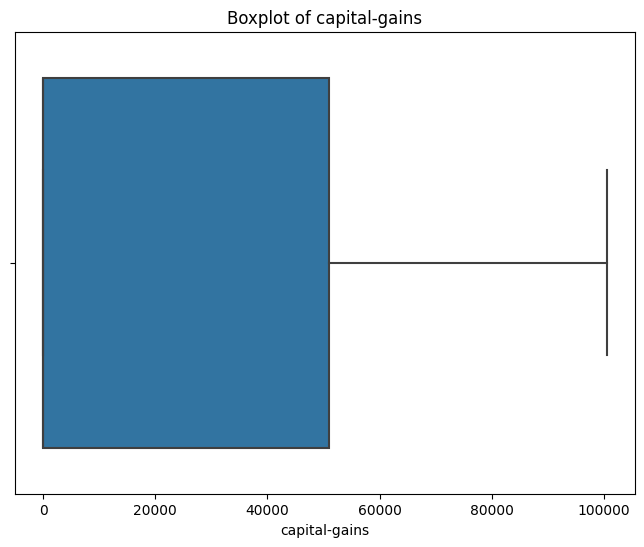

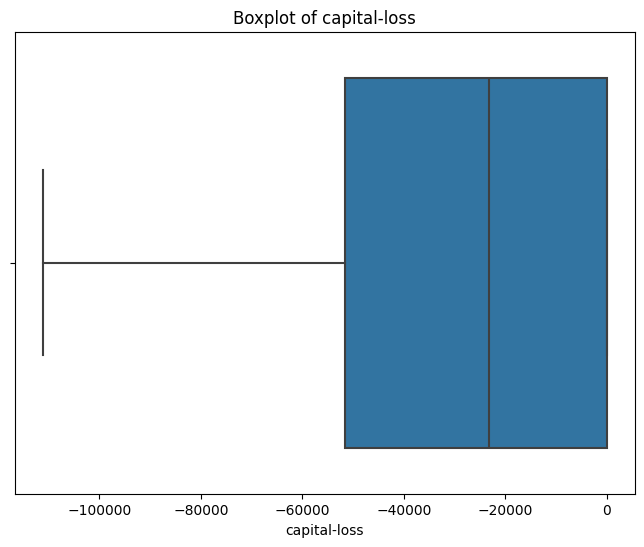

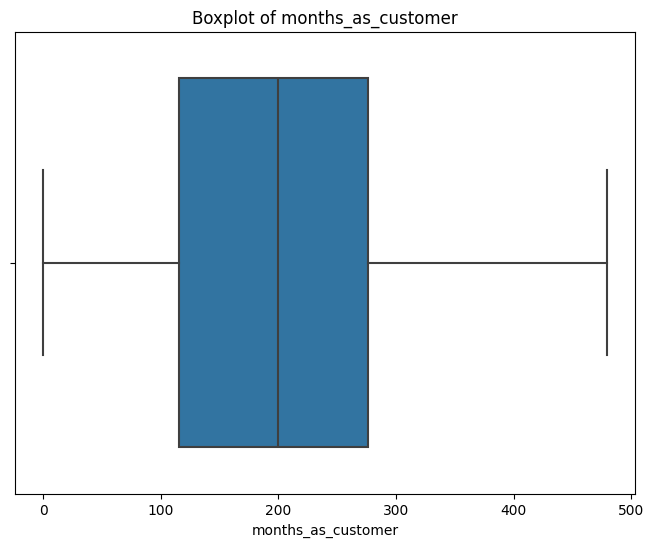

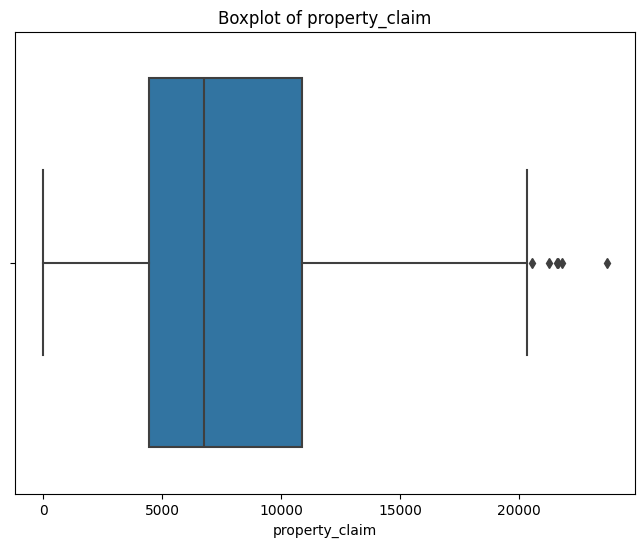

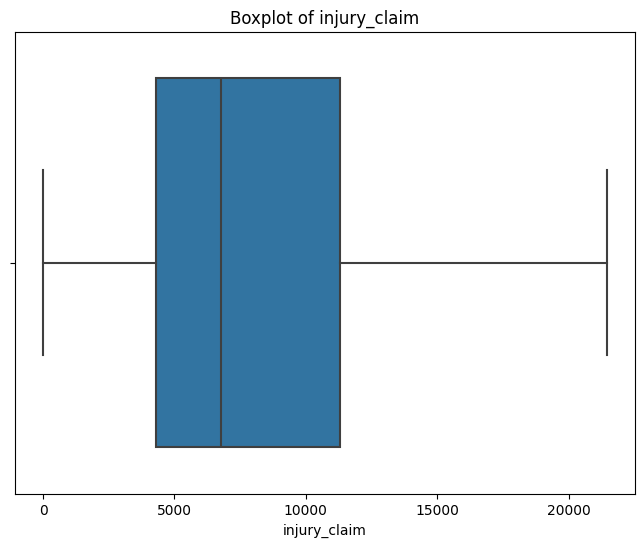

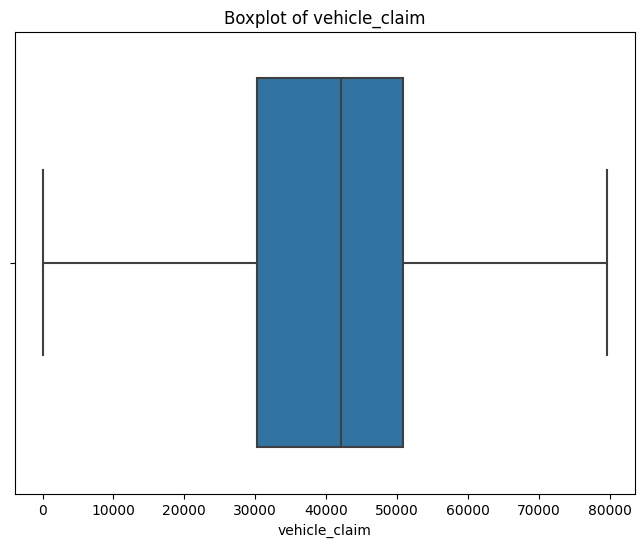

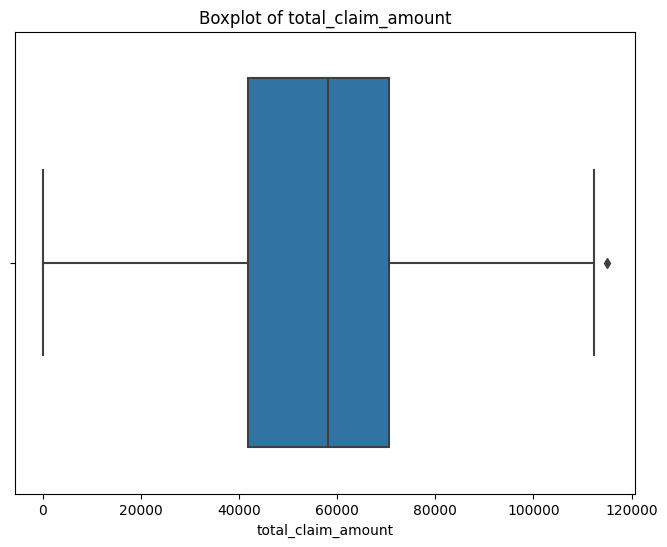

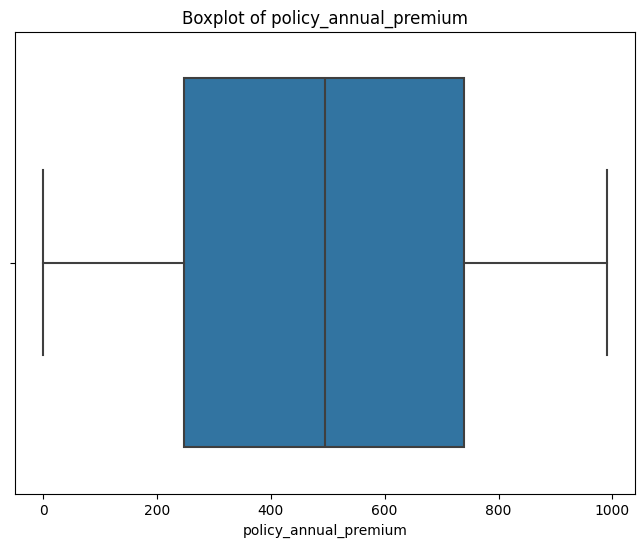

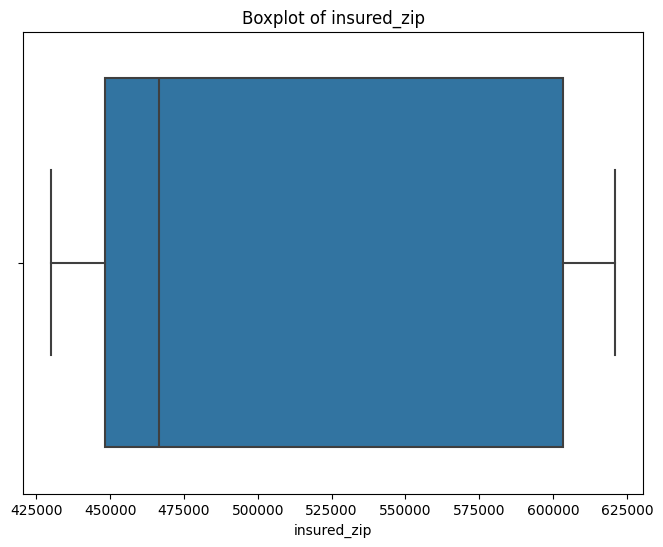

In [57]:
col = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer',
       'property_claim', 'injury_claim', 'vehicle_claim', 'total_claim_amount',
       'policy_annual_premium', 'insured_zip']


for column in col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))

z

months_as_customer       age  policy_state  policy_csl  \
0              1.078140  0.990836      1.187173    0.060937   
1              0.208995  0.334073      0.016856    0.060937   
2              0.608002  1.088913      1.187173    1.182668   
3              0.452355  0.224613      1.220886    0.060937   
4              0.208995  0.552994      1.220886    1.304542   
..                  ...       ...           ...         ...   
995            1.746582  0.103769      1.187173    1.304542   
996            0.704407  0.224613      1.220886    1.182668   
997            0.642767  0.541611      1.187173    0.060937   
998            2.208028  2.523284      1.220886    1.304542   
999            2.190645  2.304363      1.187173    0.060937   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0             0.222383               0.296253        0.479476     0.489529   
1             1.412784               0.879770        1.697980     0.461008   
2             1.412784               0.324253        1.697980     0.984885   
3             1.412784               0.334753        2.133471     1.491682   
4             0.222383               0.891264        2.133471     1.527808   
..                 ...                    ...             ...          ...   
995           0.222383               0.246258        0.479476     0.975717   
996           0.222383               0.411755        0.479476     1.492519   
997           1.039966               0.152750        0.826998     0.815138   
998           1.412784               0.016247        1.697980     0.830250   
999           0.222383               1.269271        0.479476     1.549492   

     insured_sex  insured_education_level  ...  auto_make  auto_model  \
0       1.076953                 0.530931  ...   0.856466    1.645743   
1       1.076953                 0.530931  ...   0.360539    0.657470   
2       0.928546                 1.557877  ...   0.631315    0.959702   
3       0.928546                 1.557877  ...   0.879279    1.319074   
4       1.076953                 1.522961  ...   1.623169    1.049545   
..           ...                      ...  ...        ...         ...   
995     0.928546                 1.044404  ...   0.135388    1.196528   
996     0.928546                 1.557877  ...   1.600357    0.780016   
997     0.928546                 1.044404  ...   1.104430    0.028570   
998     1.076953                 1.522961  ...   1.375206    1.286371   
999     0.928546                 1.522961  ...   0.360539    0.657470   

     auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0     0.183440        1.746019         0.176292           0.983684   
1     0.315491        1.746019         1.312191           0.159802   
2     0.315491        0.572731         1.073198           0.697813   
3     1.479664        1.746019         1.085011           0.445674   
4     0.648112        0.572731         1.073198           0.159802   
..         ...             ...              ...                ...   
995   0.149180        0.572731         0.062702           0.126069   
996   1.645974        0.572731         1.186788           1.589160   
997   1.513924        0.572731         0.176292           1.303289   
998   1.181303        0.572731         0.289882           1.269556   
999   0.315491        0.572731         0.505248           1.269556   

     policy_bind_Year  incident_Day  incident_Month  incident_Year  
0            1.684992      1.154424        0.947587            NaN  
1            0.597550      0.692885        0.947587            NaN  
2            0.218032      0.808270        0.962871            NaN  
3            1.577335      0.576347        0.947587            NaN  
4            1.684992      0.231346        0.962871            NaN  
..                ...           ...             ...            ...  
995          1.441405      0.808270        0.962871            NaN  
996          1.684992      1.039039      

In [59]:
# Lets check the skewness:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.000633
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.064799
bodily_injuries                0.014412


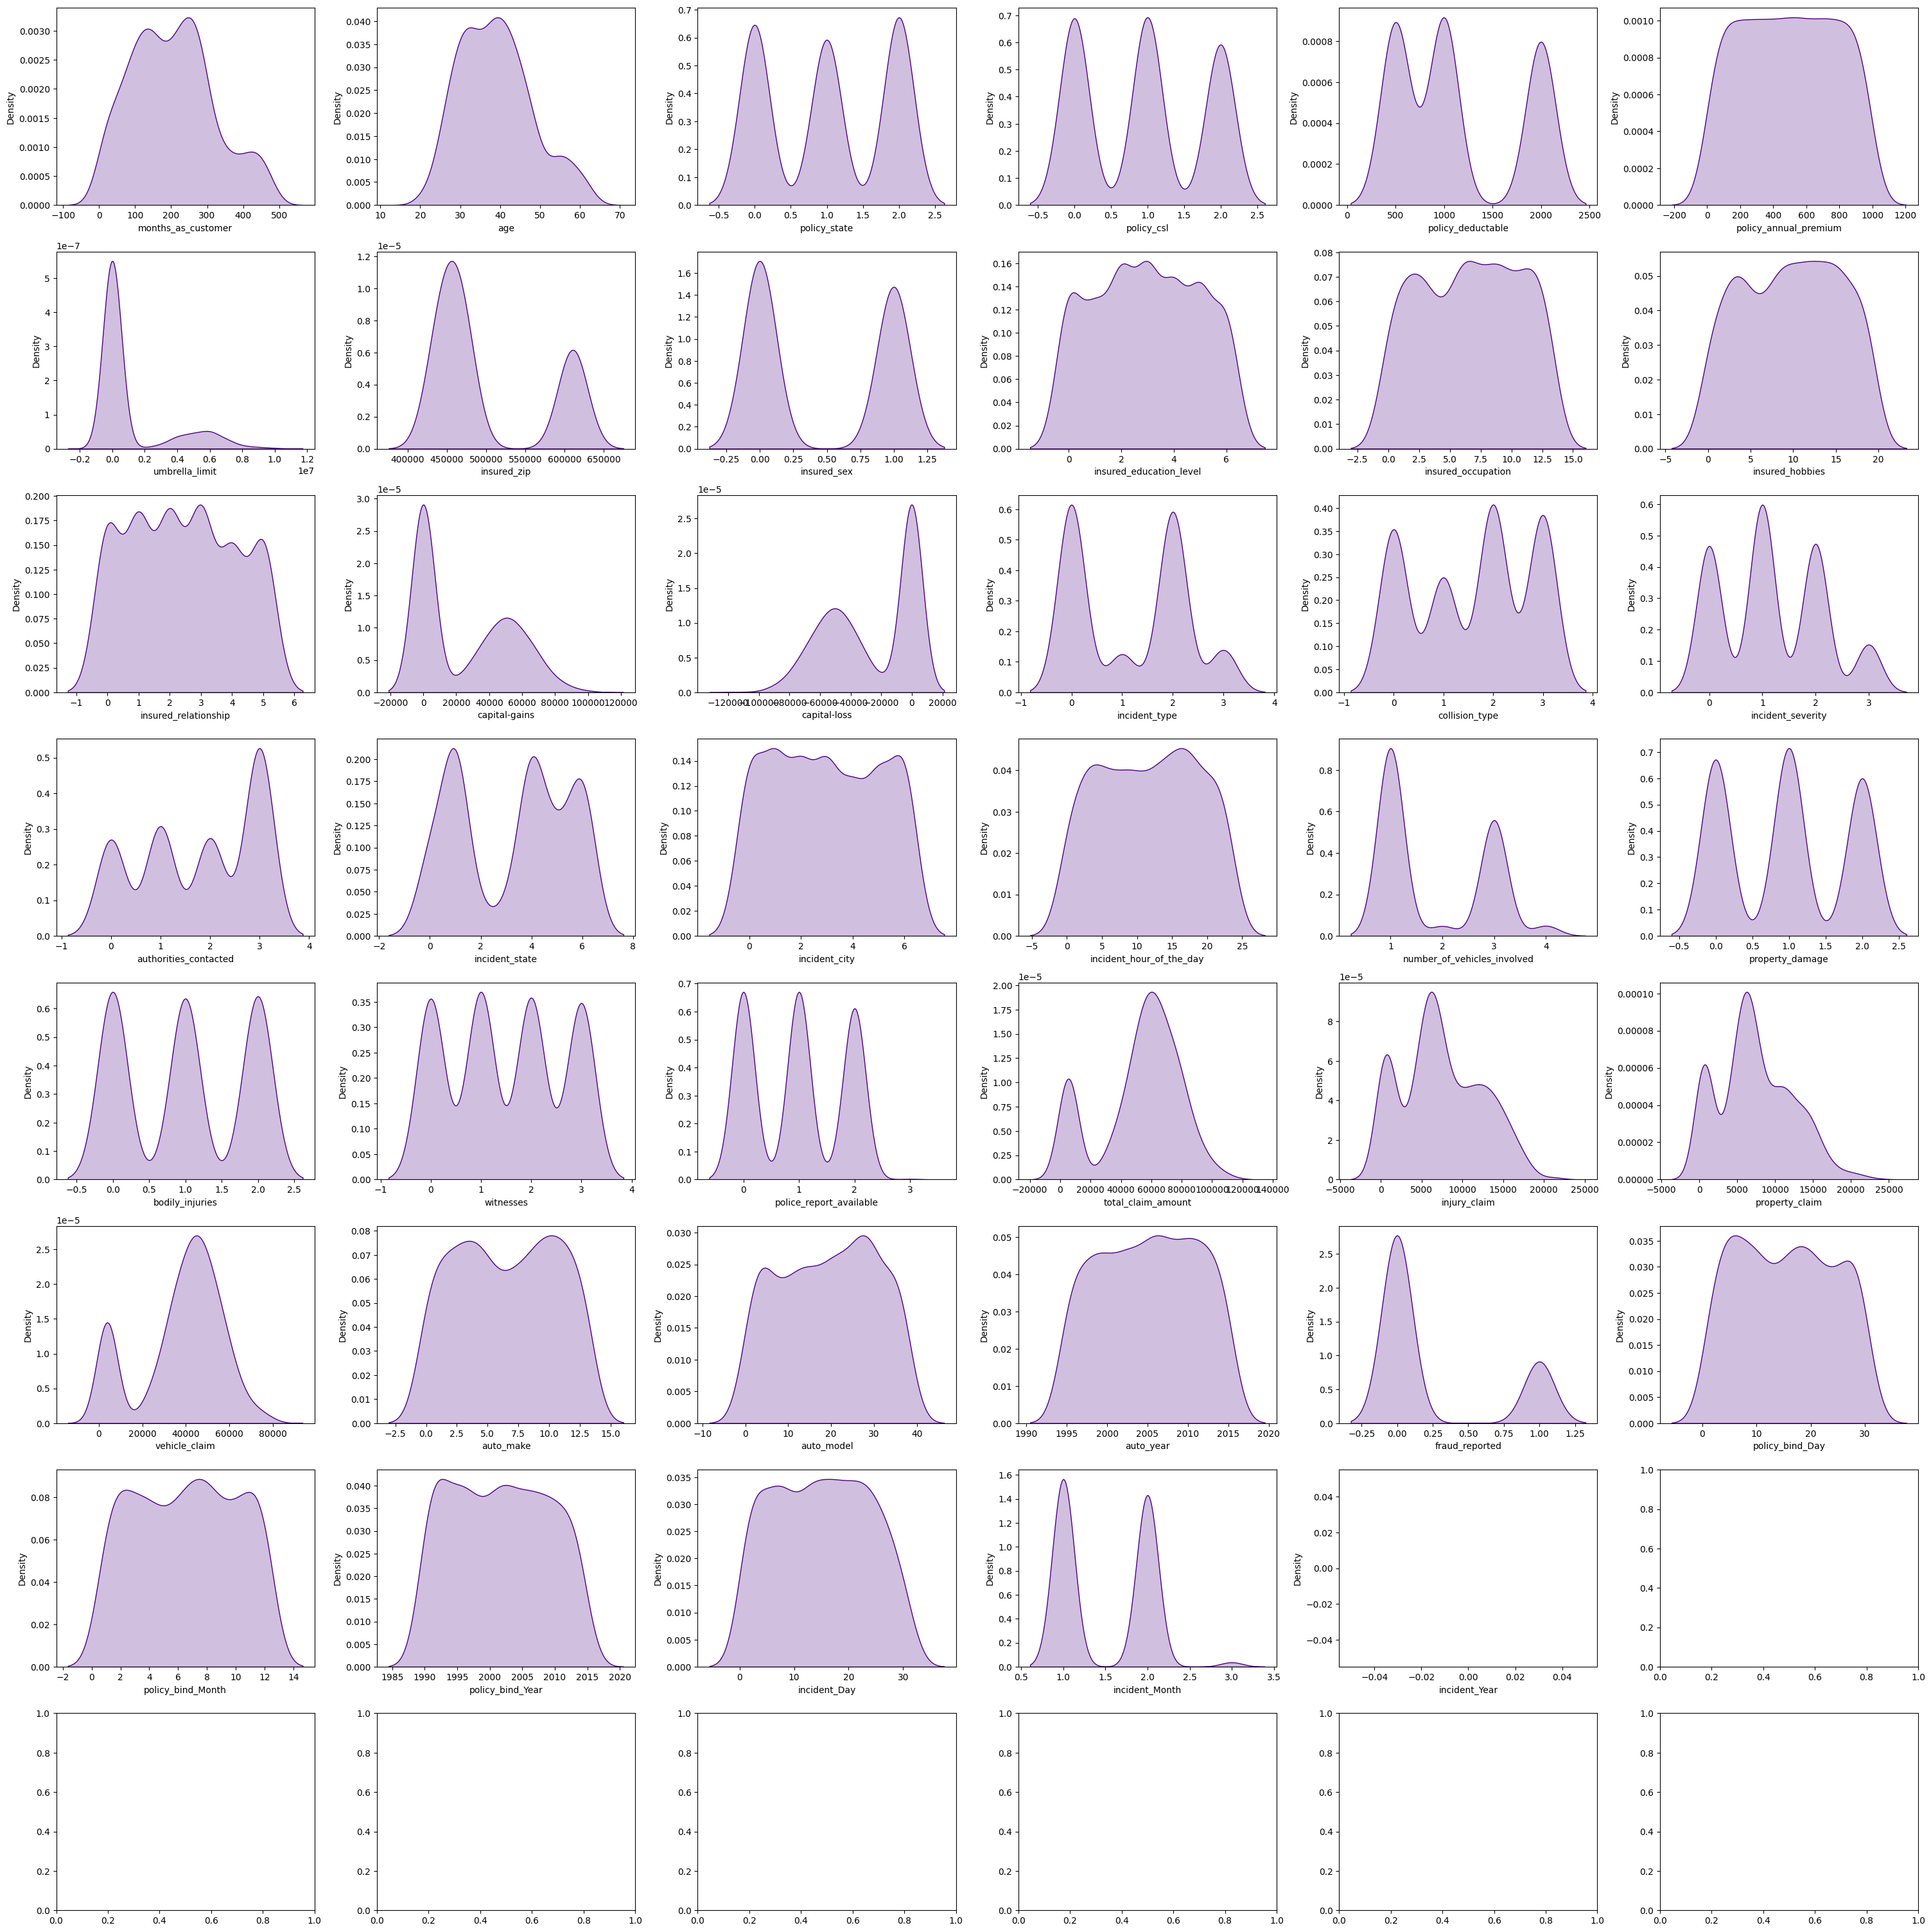

In [60]:
fig, ax = plt.subplots(ncols=6, nrows=8, figsize=(30,30))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="indigo", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

## Correlation

In [61]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.009951  0.012871      0.001631   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_zip                            0.017895  0.025604      0.008777   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.065432 -0.071117      0.057763   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.001784  0.004918     -0.008075   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.002309 -0.004365     -0.023346   
bodily_injuries                       -0.010030 -0.015558      0.013529   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.054255 -0.048461      0.048035   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   
policy_bind_Day                        0.054809  0.056776      0.011178   
policy_bind_Month                     -0.001559  0.008357      0.046871   
policy_bind_Year                      -0.048276 -0.037444     -0.007276   
incident_Day                          -0.001455  0.003697      0.025572   
incident_Month                        -0.042826 -0.037058      0.018531   
incident_Year                               NaN       NaN           NaN   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026819           0.026807   
age                           -0.015185           0.029188   
policy_state                   0.001027           0.010033   
policy_csl                     1.000000           0.003384   
policy_deductable              0.003384           1.000000   
policy_annual_premium         -0.006575          -0.076014   
umbrella_limit                 0.021636           0.010870   
insured_zip                    0.006879           0.004545   
insured_sex                   -0.010757          -0.009733   
insured_education_level        0.009153           0.015217   
insured_occupation             0.015788          -0.046733   
insured_hobbies               -0.005960           0.004061   
insured_relationship          -0.030063          -0.022945   
capital-ga

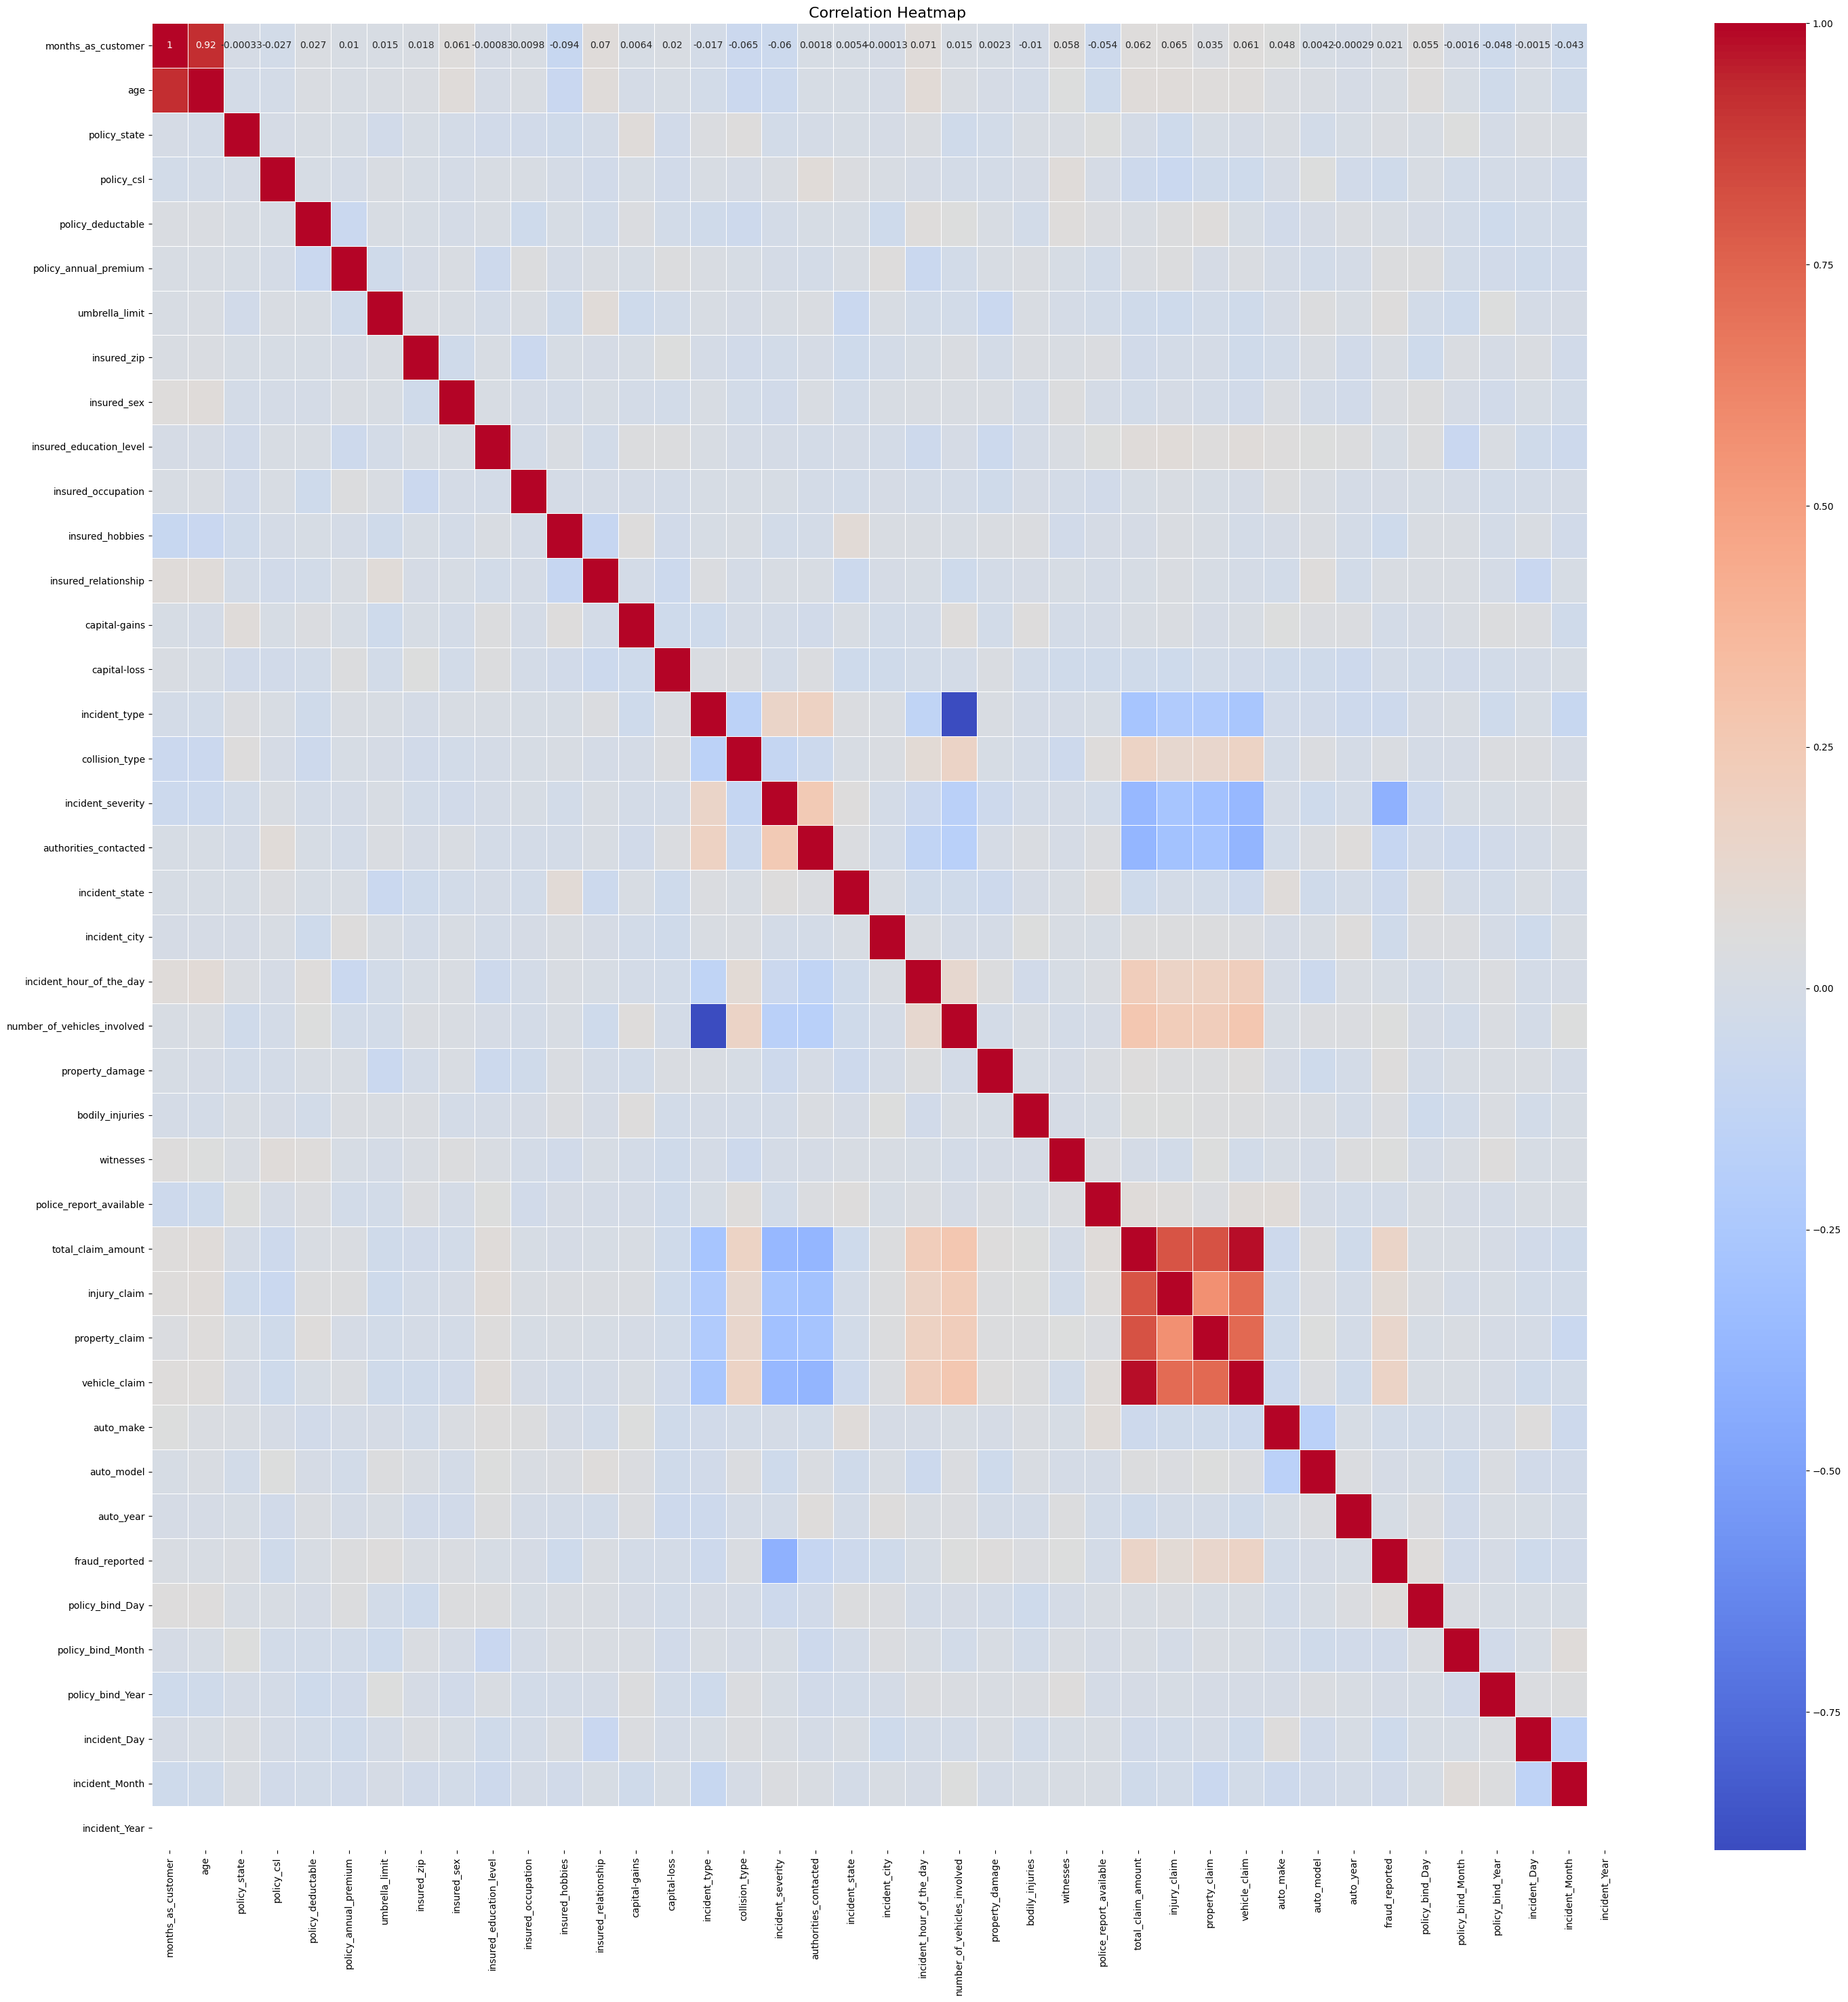

In [62]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

We can see that some columns are multi collinear.

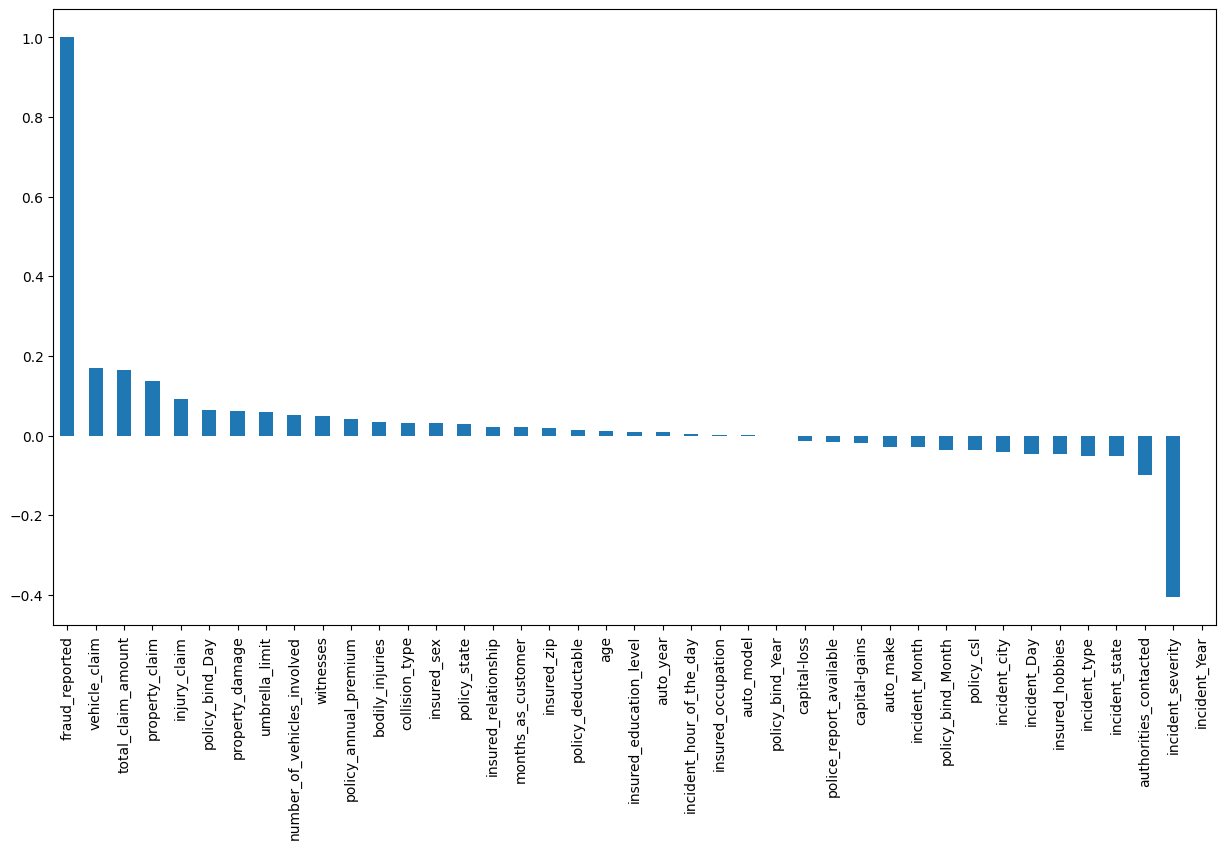

In [63]:
corr = df.corr()

plt.figure(figsize=(15, 8))
corr['fraud_reported'].sort_values(ascending=False).plot(kind='bar')
plt.show()

We can see that incident year has no correlation with our target variable and also it has NaN values, so we will drop columns with nan values

## Data Visualization

- months_as_customer vs fraud_reported


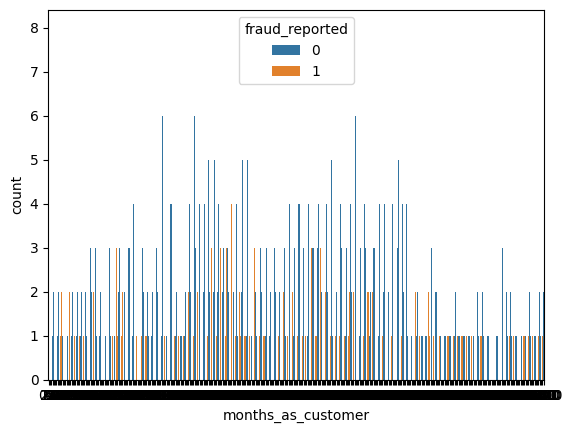

<Figure size 1500x700 with 0 Axes>

- age vs fraud_reported


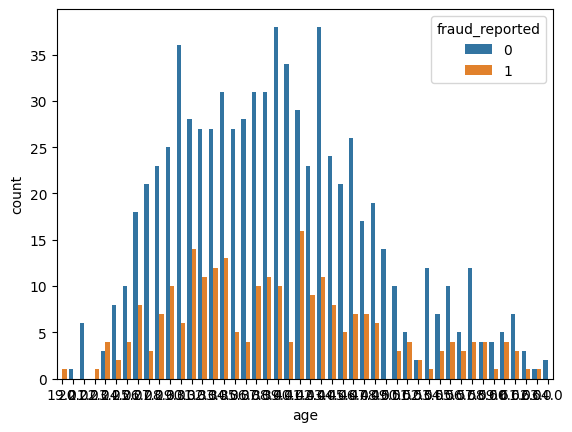

<Figure size 1500x700 with 0 Axes>

- policy_state vs fraud_reported


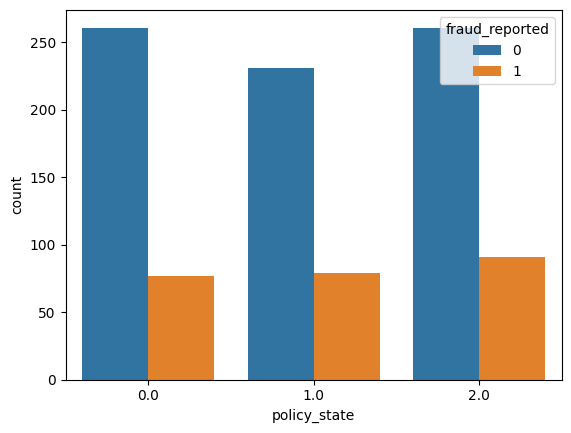

<Figure size 1500x700 with 0 Axes>

- policy_csl vs fraud_reported


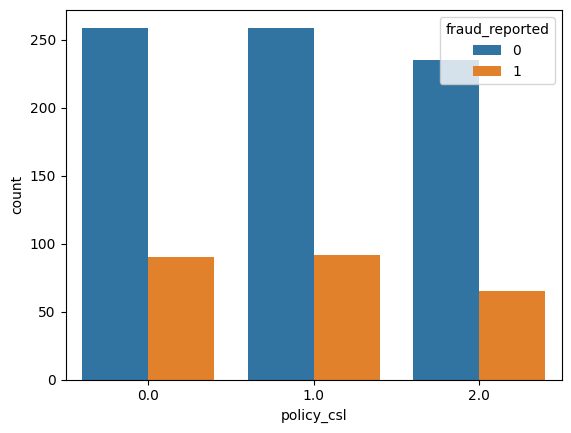

<Figure size 1500x700 with 0 Axes>

- policy_deductable vs fraud_reported


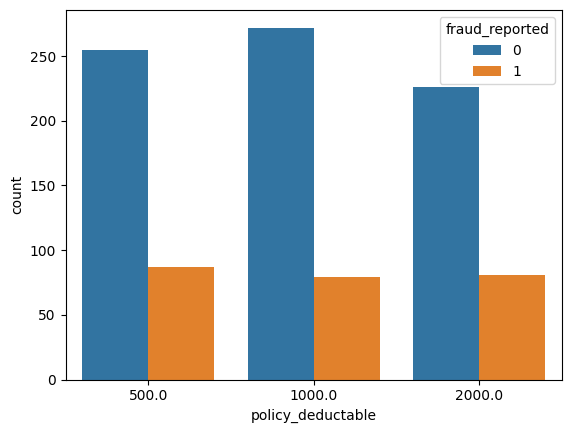

<Figure size 1500x700 with 0 Axes>

- policy_annual_premium vs fraud_reported


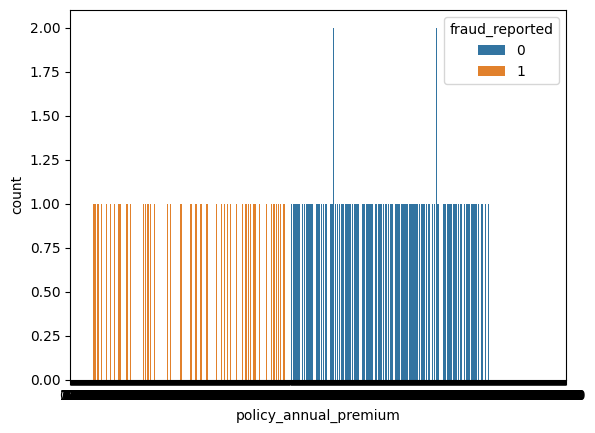

<Figure size 1500x700 with 0 Axes>

- umbrella_limit vs fraud_reported


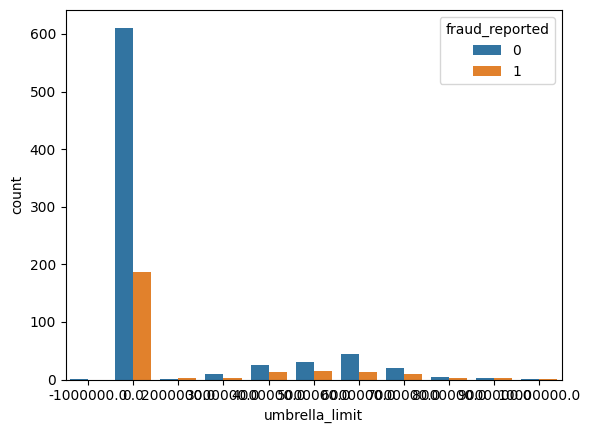

<Figure size 1500x700 with 0 Axes>

- insured_zip vs fraud_reported


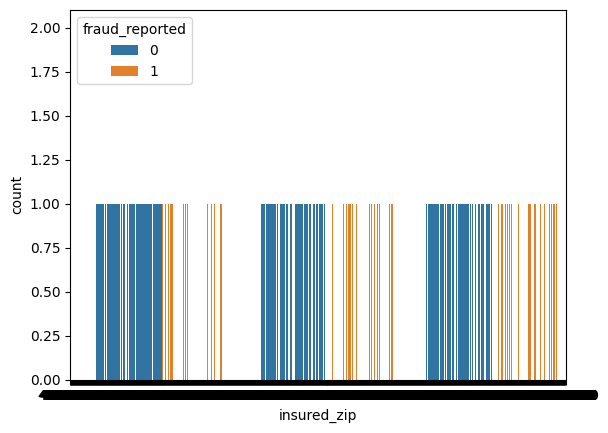

<Figure size 1500x700 with 0 Axes>

- insured_sex vs fraud_reported


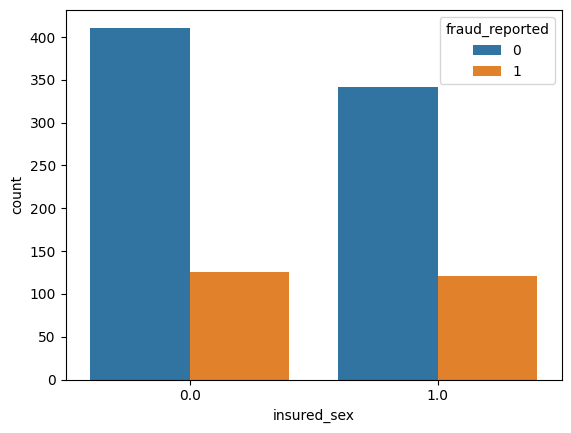

<Figure size 1500x700 with 0 Axes>

- insured_education_level vs fraud_reported


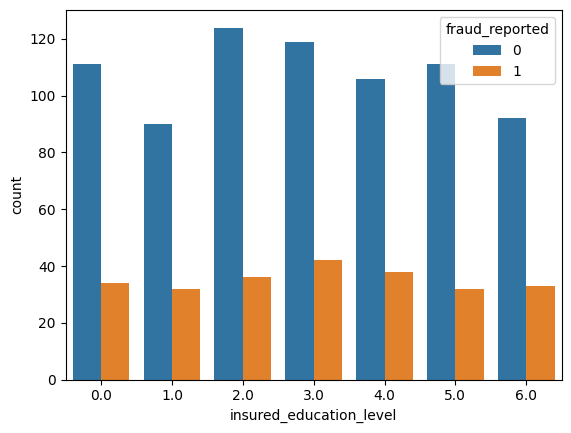

<Figure size 1500x700 with 0 Axes>

- insured_occupation vs fraud_reported


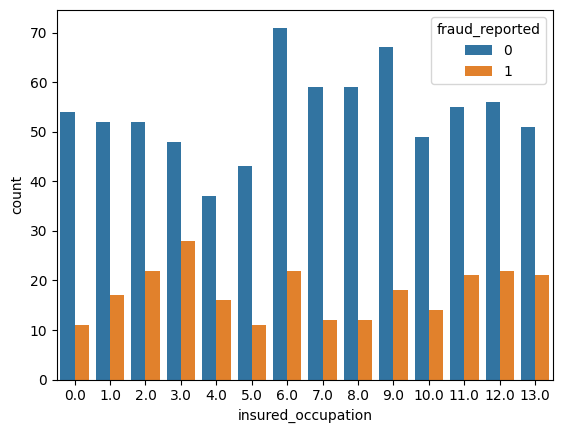

<Figure size 1500x700 with 0 Axes>

- insured_hobbies vs fraud_reported


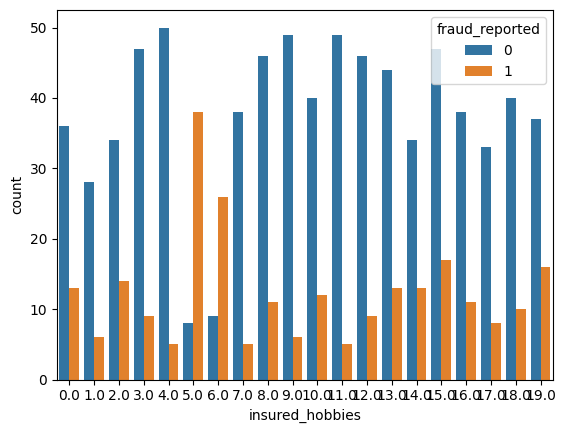

<Figure size 1500x700 with 0 Axes>

- insured_relationship vs fraud_reported


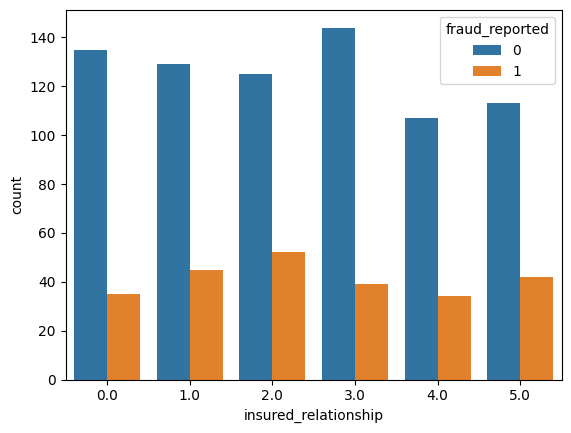

<Figure size 1500x700 with 0 Axes>

- capital-gains vs fraud_reported


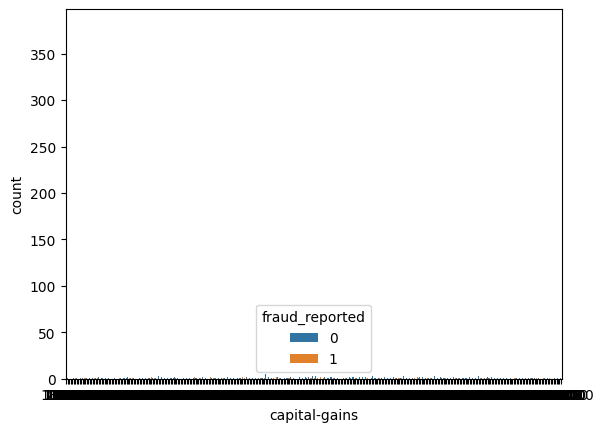

<Figure size 1500x700 with 0 Axes>

- capital-loss vs fraud_reported


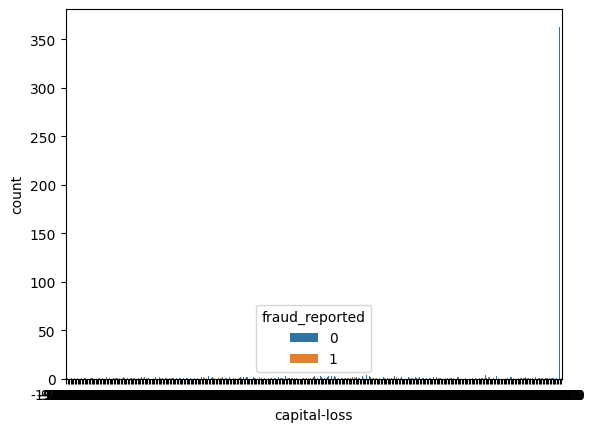

<Figure size 1500x700 with 0 Axes>

- incident_type vs fraud_reported


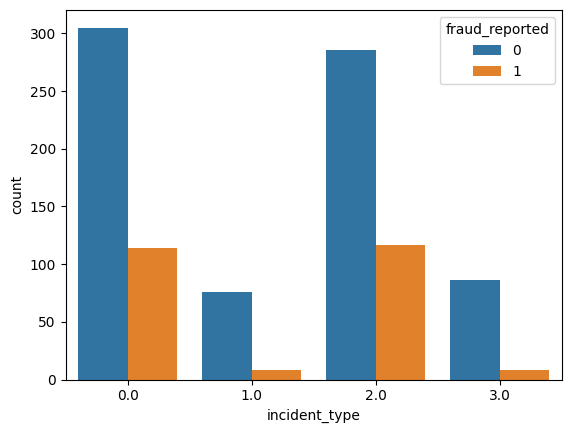

<Figure size 1500x700 with 0 Axes>

- collision_type vs fraud_reported


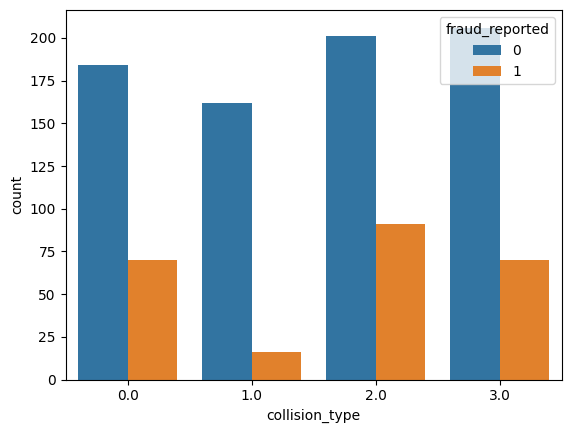

<Figure size 1500x700 with 0 Axes>

- incident_severity vs fraud_reported


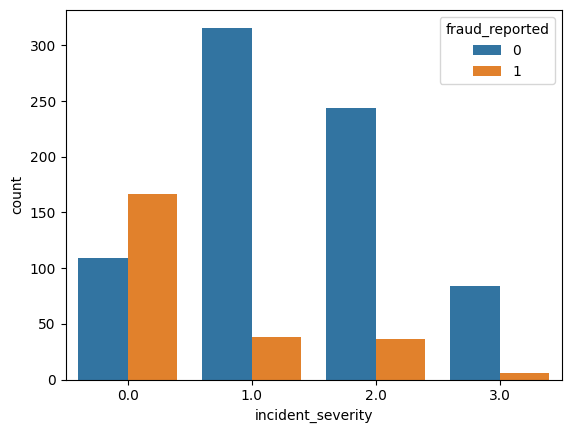

<Figure size 1500x700 with 0 Axes>

- authorities_contacted vs fraud_reported


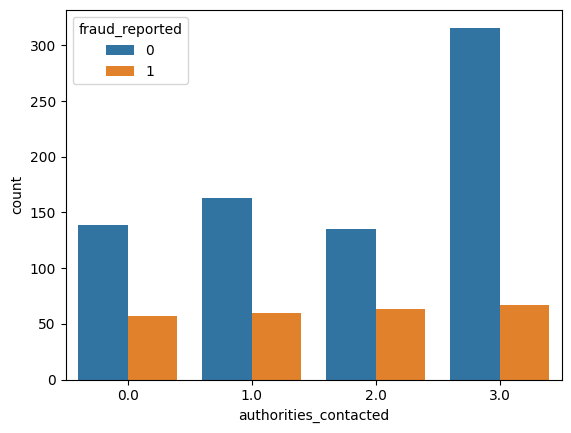

<Figure size 1500x700 with 0 Axes>

- incident_state vs fraud_reported


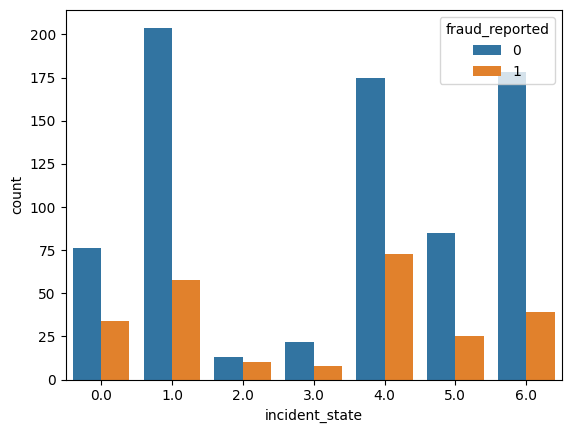

<Figure size 1500x700 with 0 Axes>

- incident_city vs fraud_reported


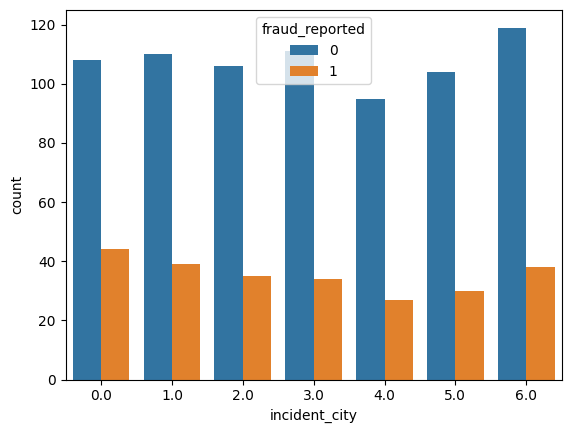

<Figure size 1500x700 with 0 Axes>

- incident_hour_of_the_day vs fraud_reported


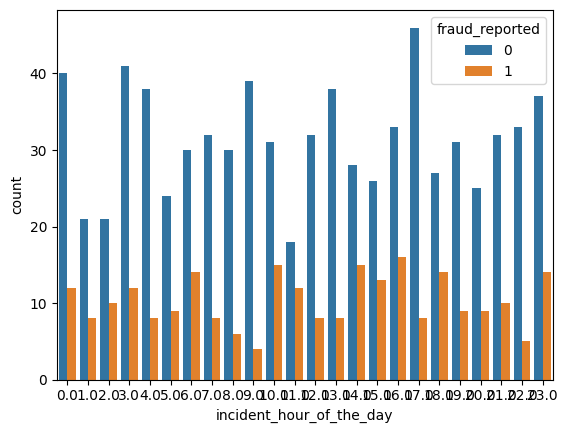

<Figure size 1500x700 with 0 Axes>

- number_of_vehicles_involved vs fraud_reported


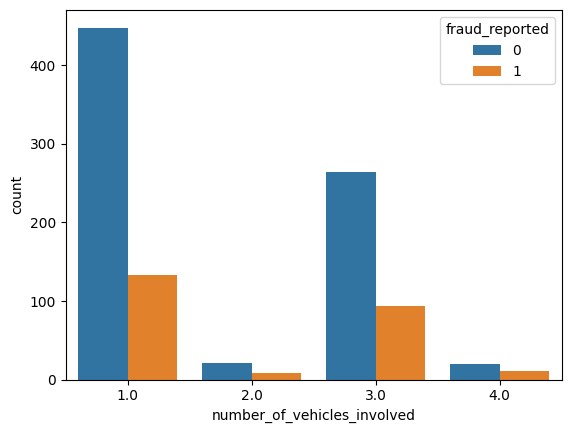

<Figure size 1500x700 with 0 Axes>

- property_damage vs fraud_reported


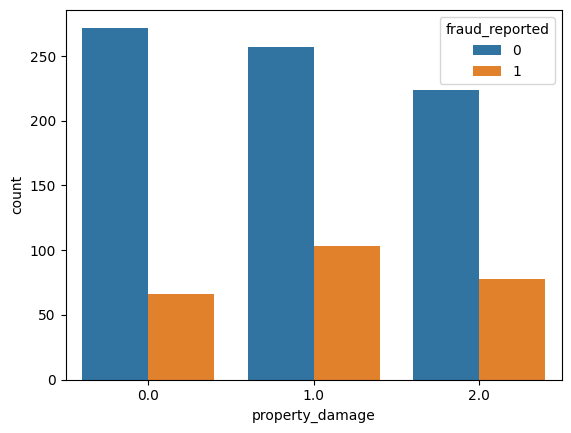

<Figure size 1500x700 with 0 Axes>

- bodily_injuries vs fraud_reported


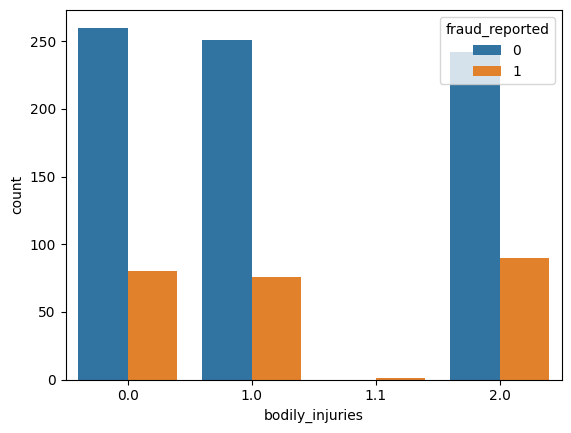

<Figure size 1500x700 with 0 Axes>

- witnesses vs fraud_reported


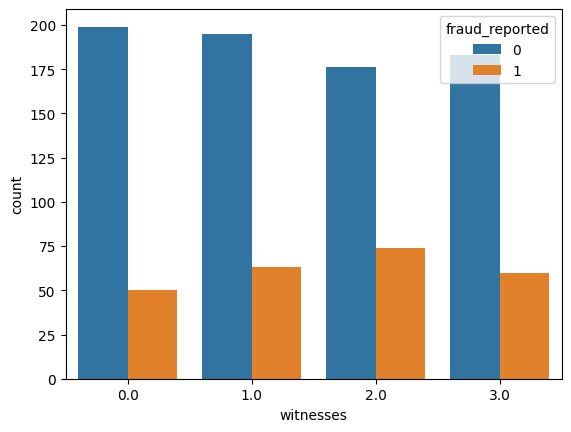

<Figure size 1500x700 with 0 Axes>

- police_report_available vs fraud_reported


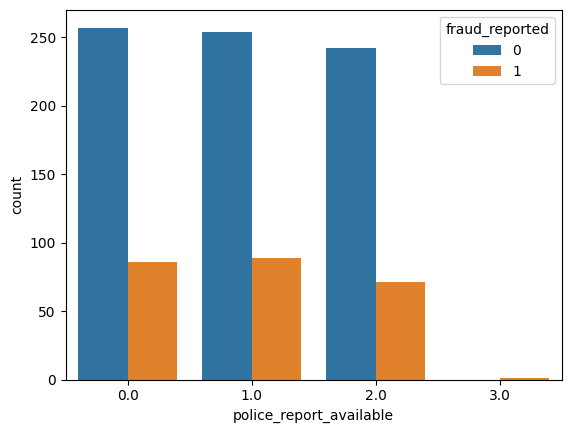

<Figure size 1500x700 with 0 Axes>

- total_claim_amount vs fraud_reported


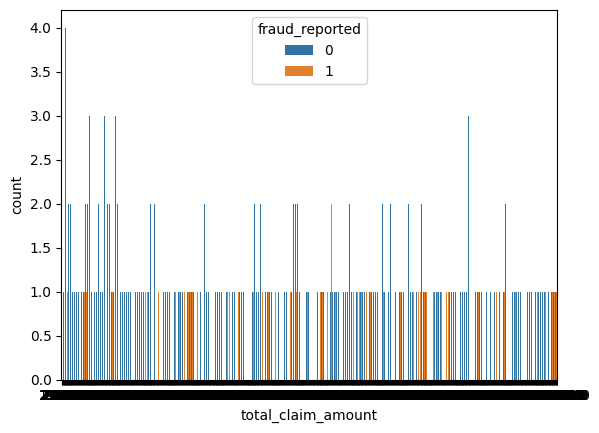

<Figure size 1500x700 with 0 Axes>

- injury_claim vs fraud_reported


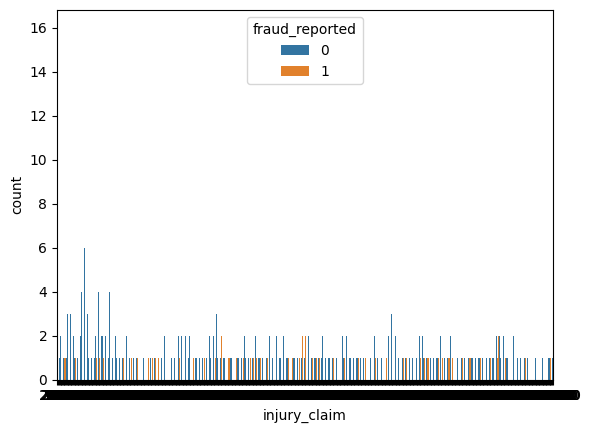

<Figure size 1500x700 with 0 Axes>

- property_claim vs fraud_reported


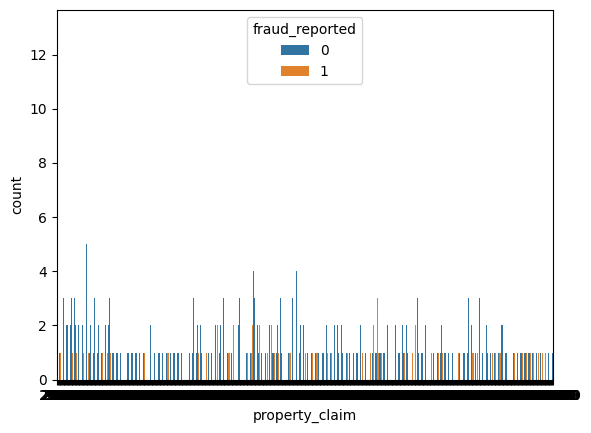

<Figure size 1500x700 with 0 Axes>

- vehicle_claim vs fraud_reported


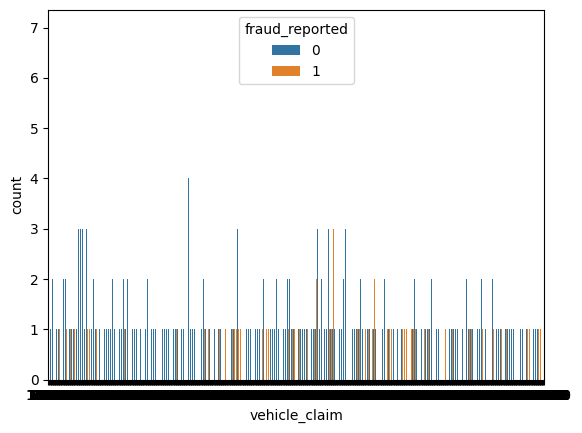

<Figure size 1500x700 with 0 Axes>

- auto_make vs fraud_reported


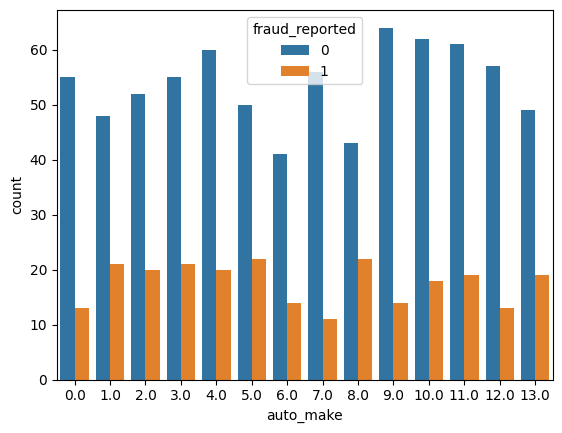

<Figure size 1500x700 with 0 Axes>

- auto_model vs fraud_reported


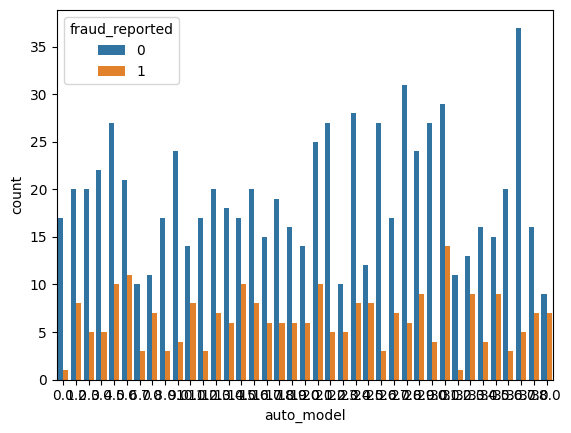

<Figure size 1500x700 with 0 Axes>

- auto_year vs fraud_reported


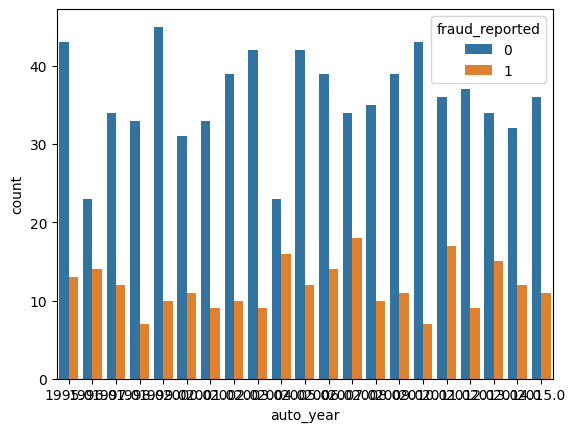

<Figure size 1500x700 with 0 Axes>

In [64]:
numerical_columns = df.select_dtypes(include=['float64']).columns
numerical_df = df[numerical_columns]

for col in numerical_columns:
    print("-",col,"vs fraud_reported")
    ax=sns.countplot(x=str(col), hue='fraud_reported',data = df)
    plt.figure(figsize=(15,7))
    (ax,df.months_as_customer,1,1)
    plt.tight_layout()
    plt.show()

Above count plot shows us the count of each column with respect to 'fraud_reported'

Single digit category column name: fraud_reported


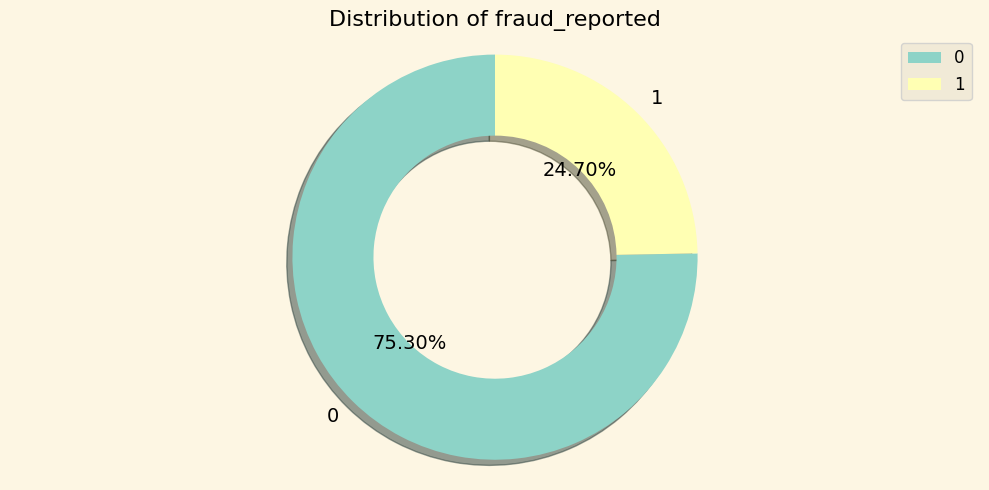

Single digit category column name: insured_sex


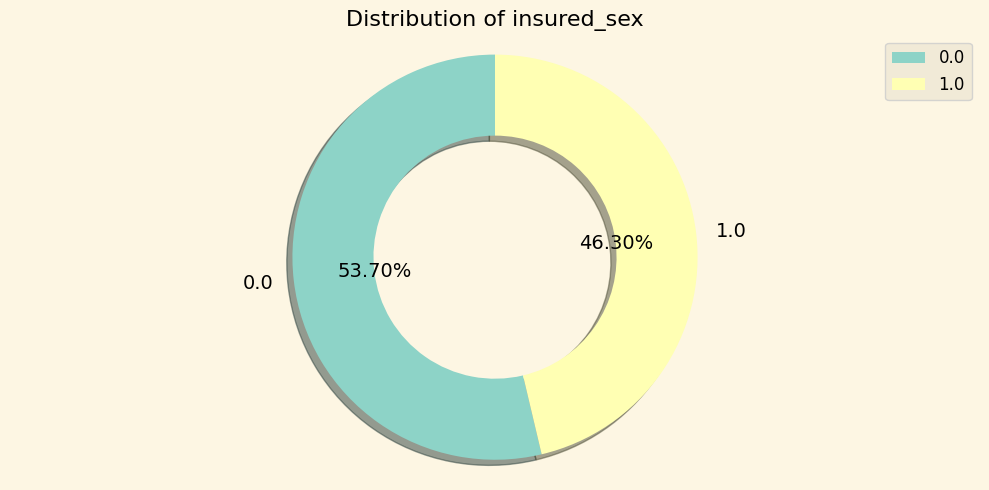

Single digit category column name: policy_state


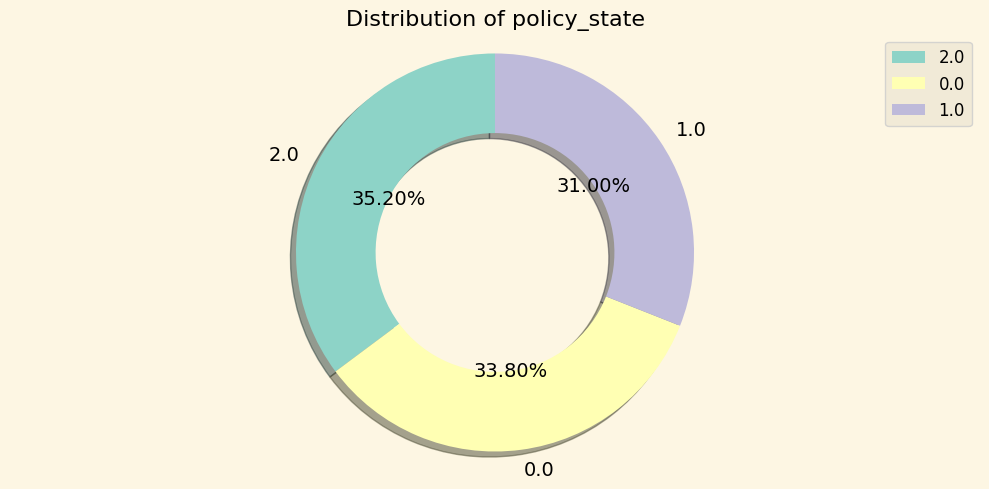

Single digit category column name: policy_csl


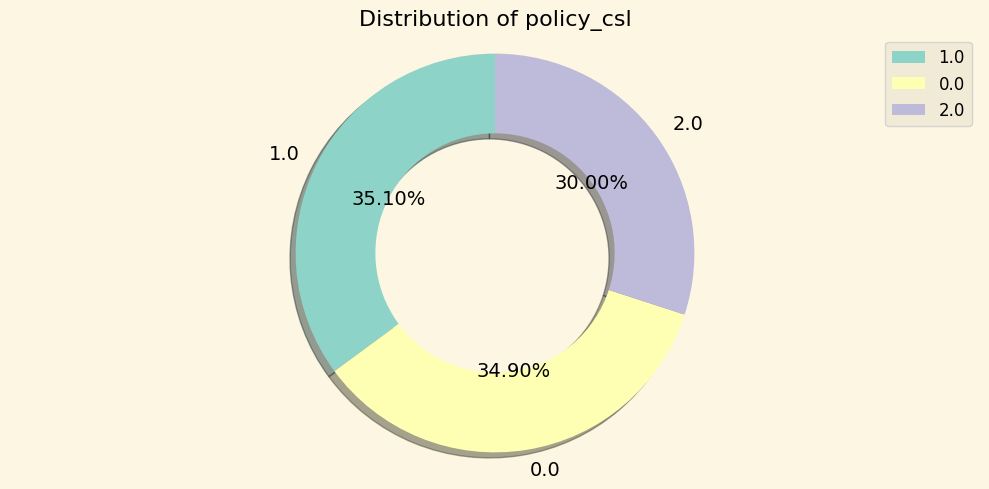

Single digit category column name: policy_deductable


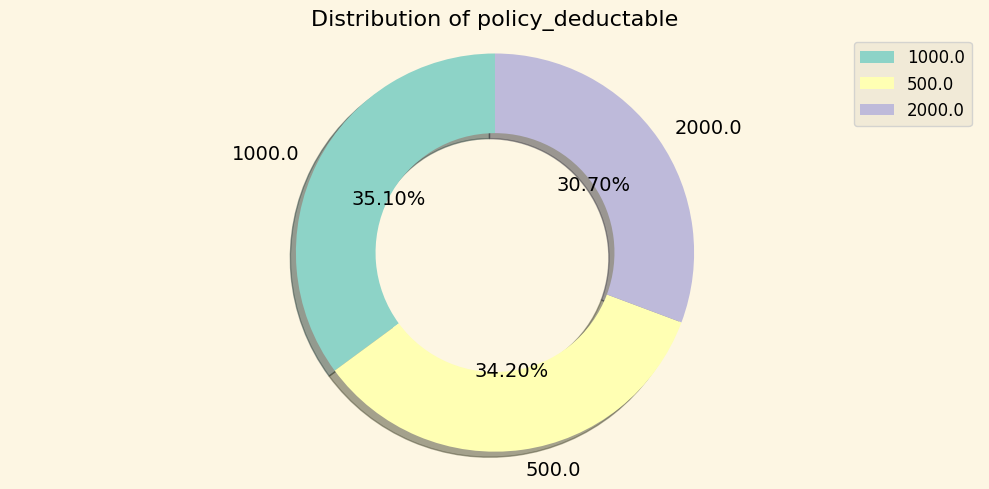

Single digit category column name: bodily_injuries


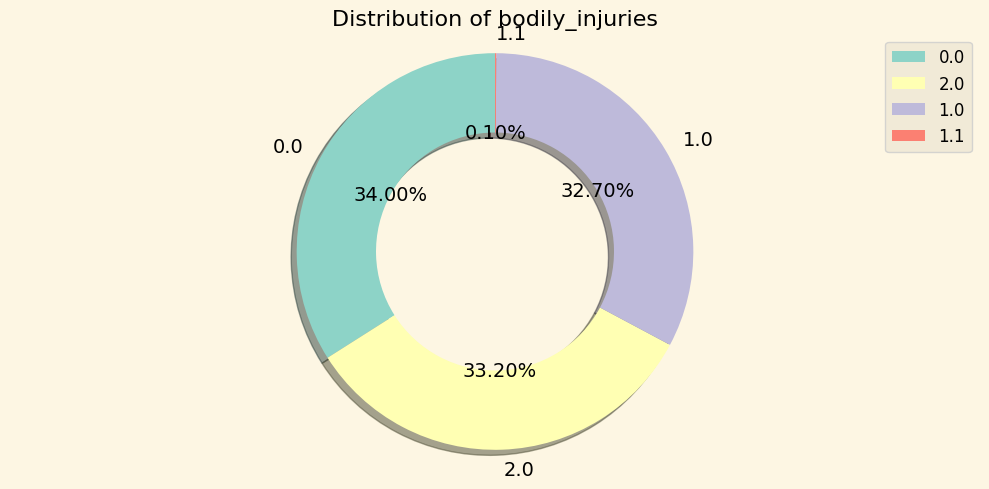

Single digit category column name: police_report_available


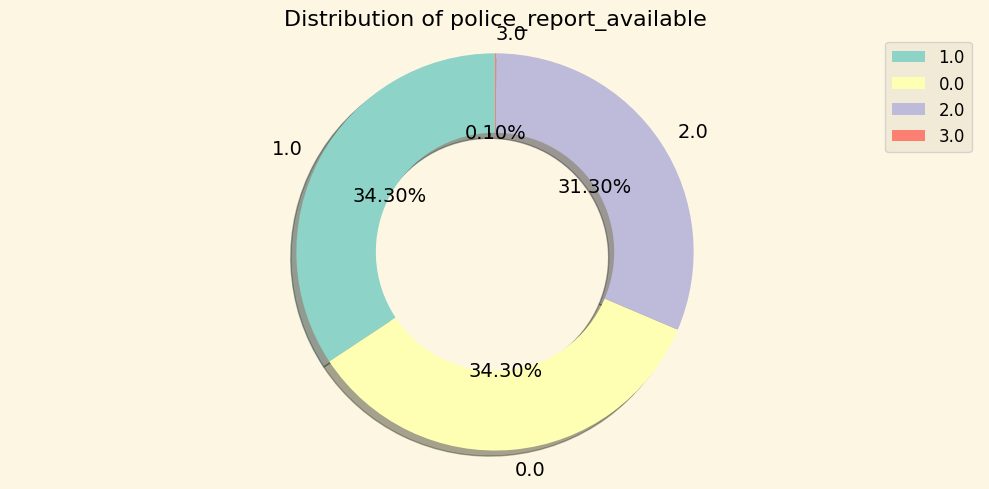

Single digit category column name: property_damage


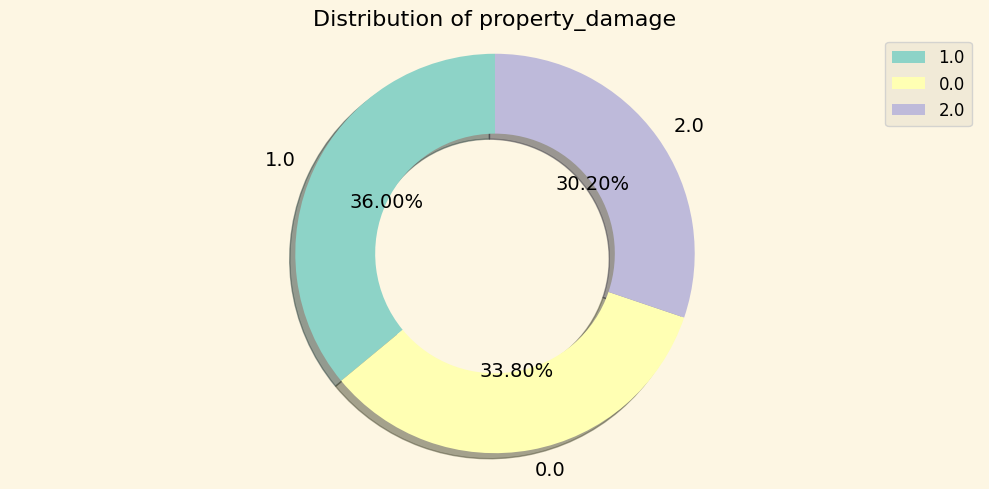

Single digit category column name: incident_type


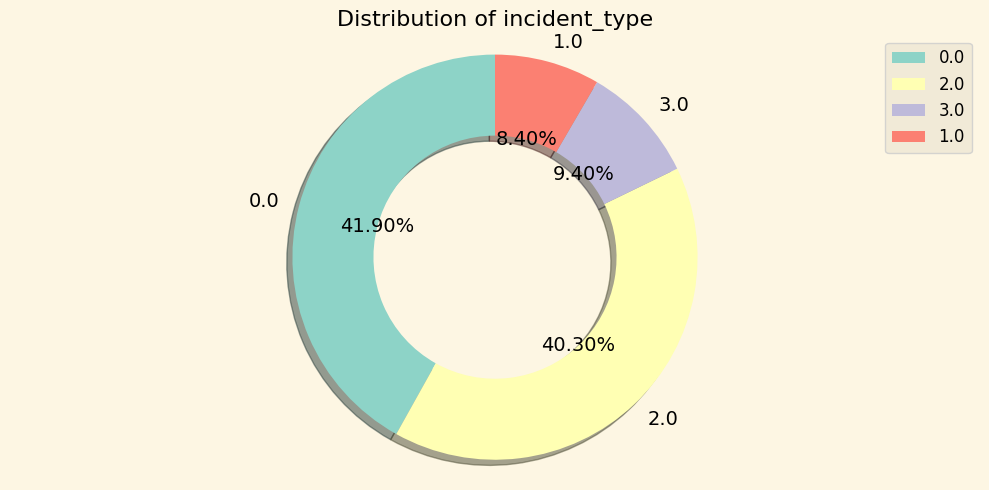

Single digit category column name: collision_type


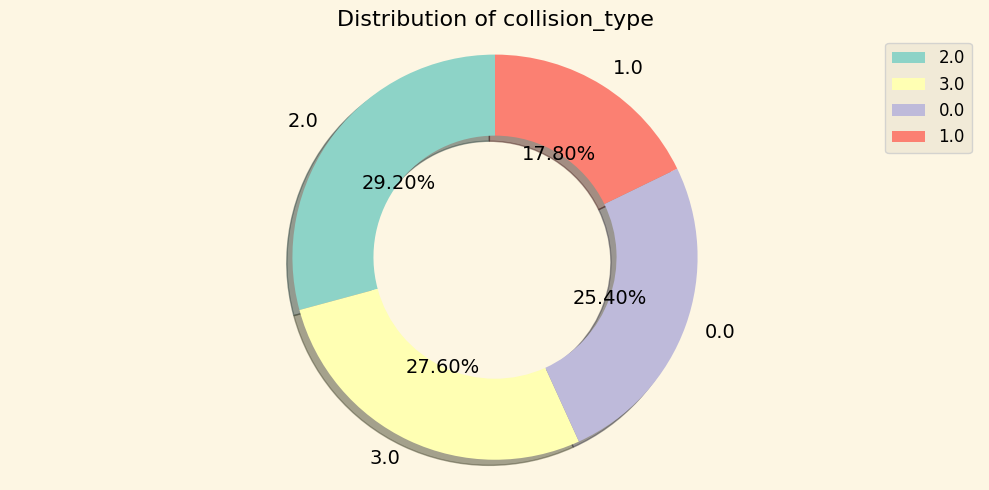

Single digit category column name: incident_severity


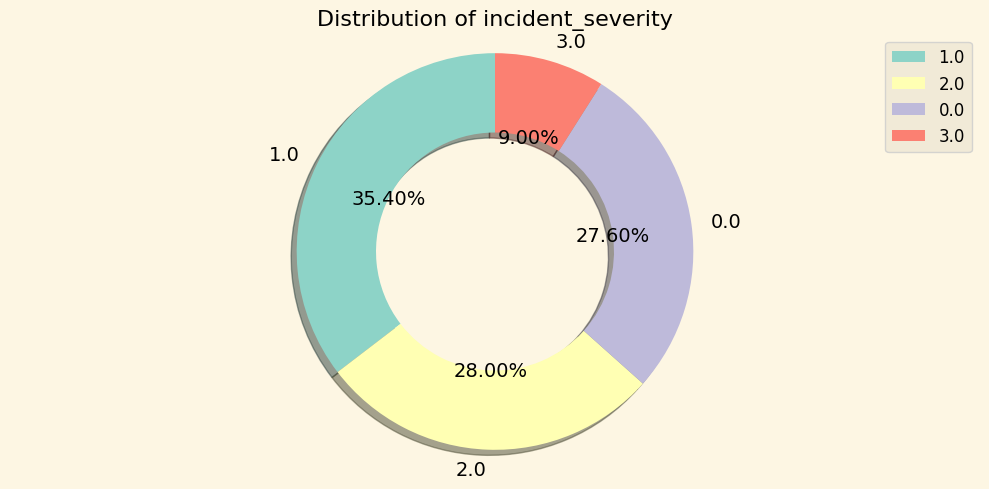

Single digit category column name: number_of_vehicles_involved


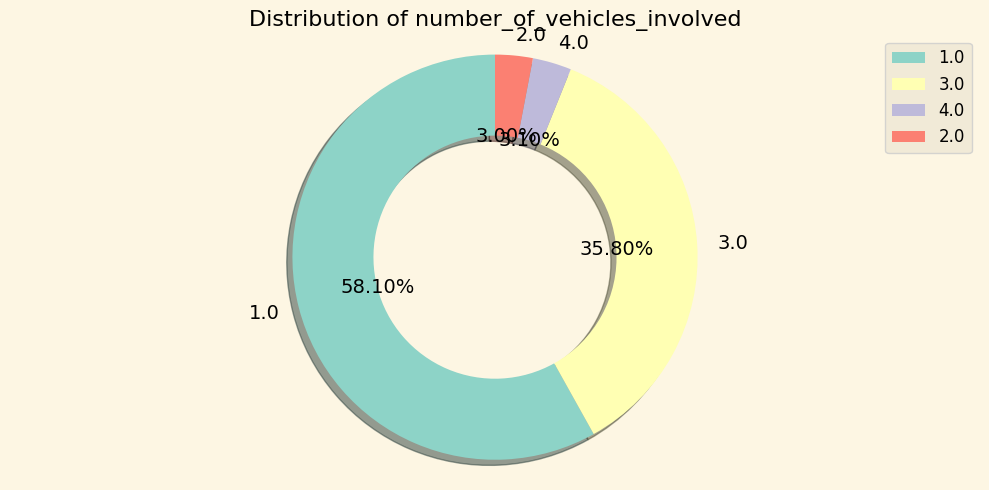

Single digit category column name: witnesses


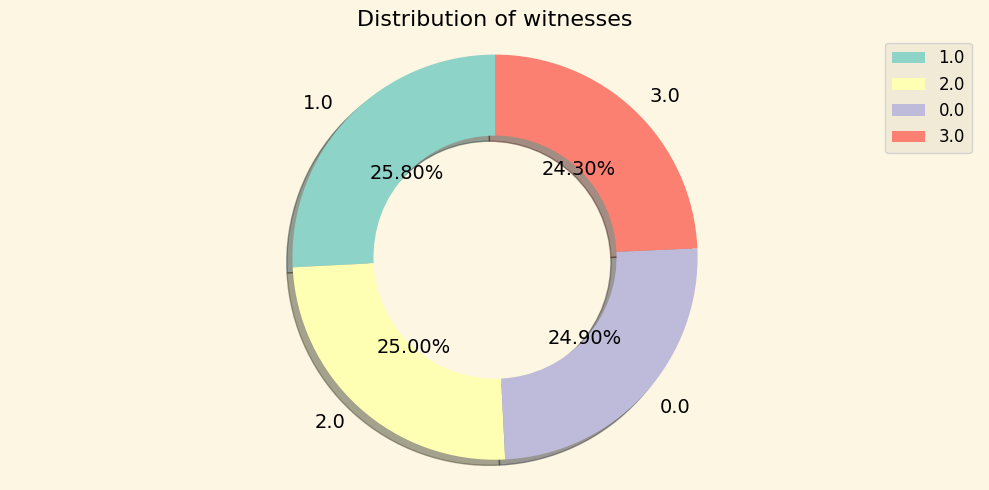

Single digit category column name: authorities_contacted


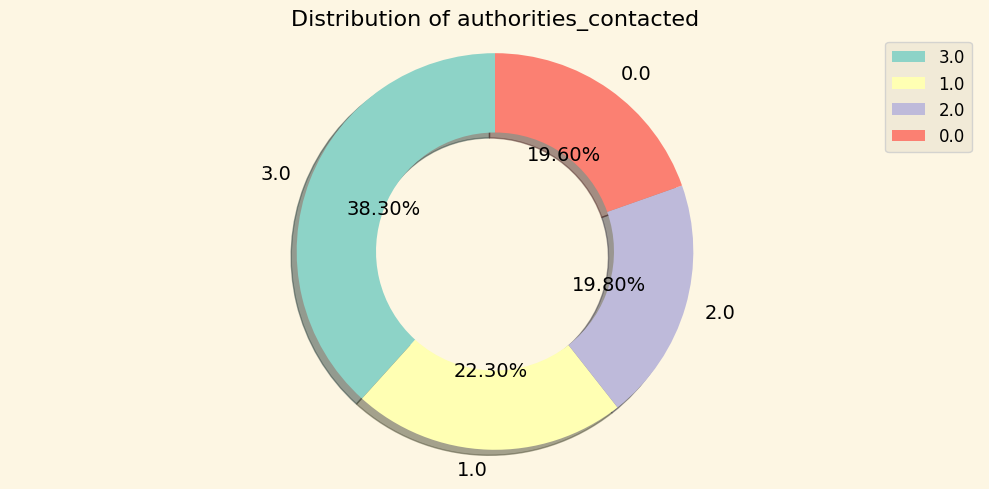

Single digit category column name: insured_relationship


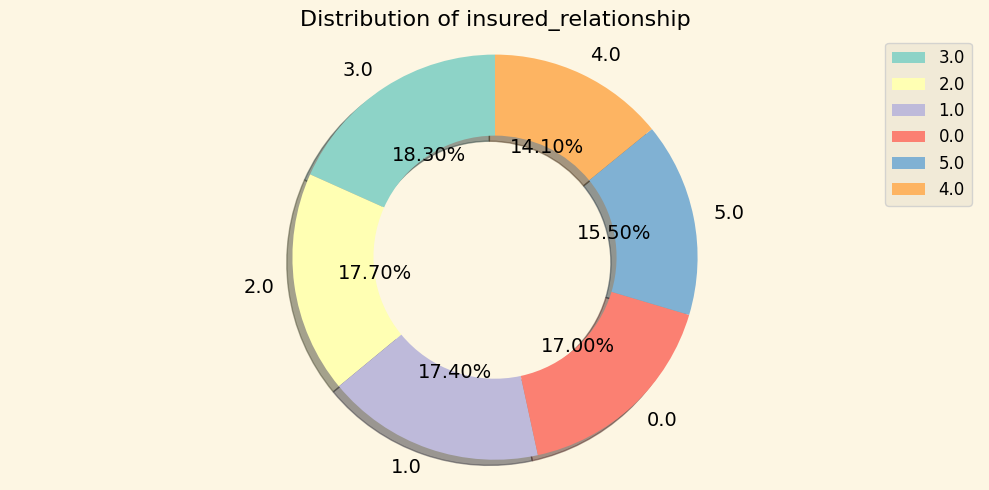

Single digit category column name: insured_education_level


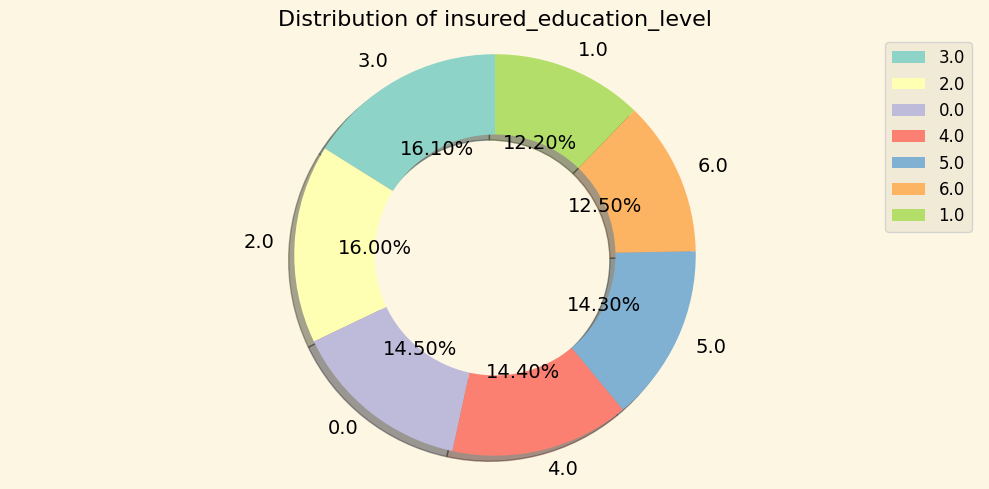

Single digit category column name: incident_state


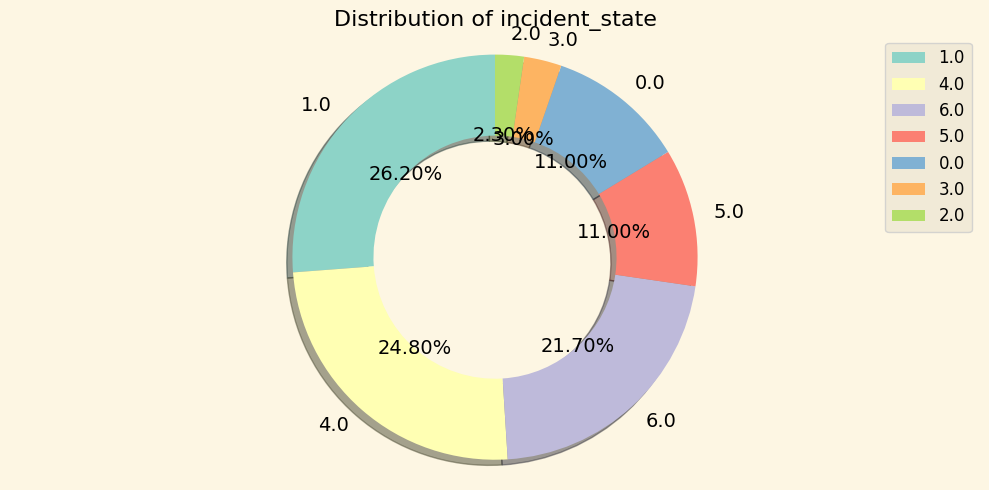

Single digit category column name: incident_city


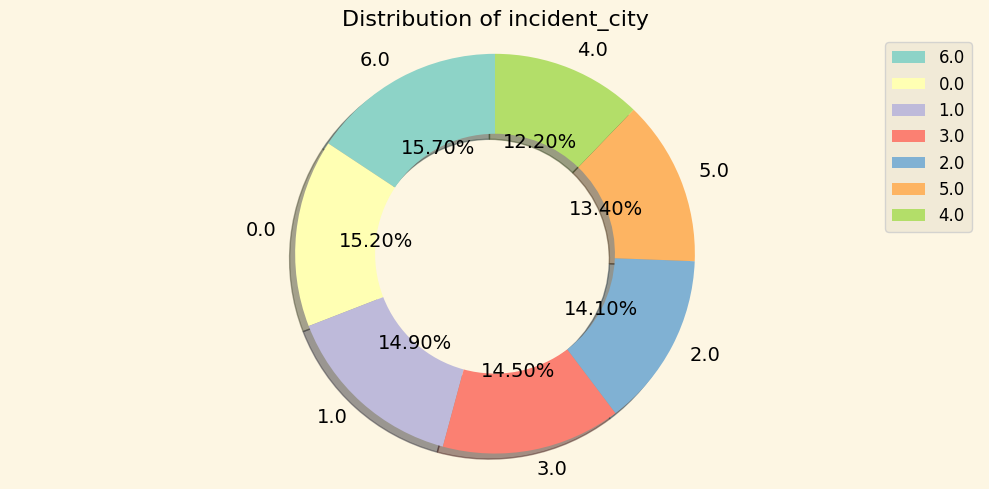

In [72]:
def generate_pie(x, title=''):
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(10, 5))
    colors = plt.cm.Set3.colors  

    plt.pie(
        x.value_counts(),
        labels=x.value_counts().index,
        shadow=True,
        autopct='%1.2f%%',
        colors=colors,
        startangle=90, 
        wedgeprops=dict(width=0.4),  
        textprops={'fontsize': 14}, 
    )

    plt.title(title, fontsize=16)
    plt.legend(prop={'size': 12})
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in col1:
    print(f"Single digit category column name:", i)
    generate_pie(df[i], title=f'Distribution of {i}')

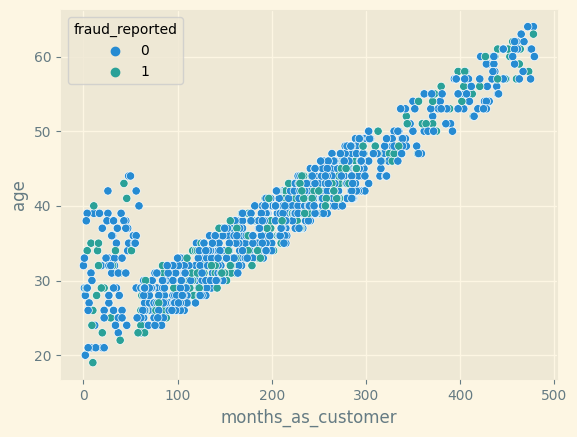

In [73]:
sns.scatterplot(x = "months_as_customer", y = "age" ,hue='fraud_reported', data = df)
plt.show()

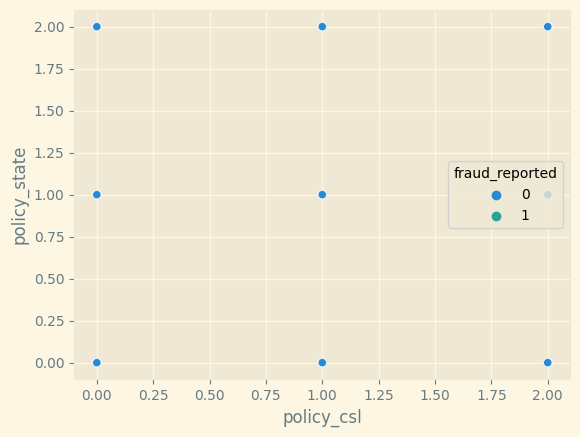

In [74]:
sns.scatterplot(x = "policy_csl", y = "policy_state" ,hue='fraud_reported', data = df)
plt.show()

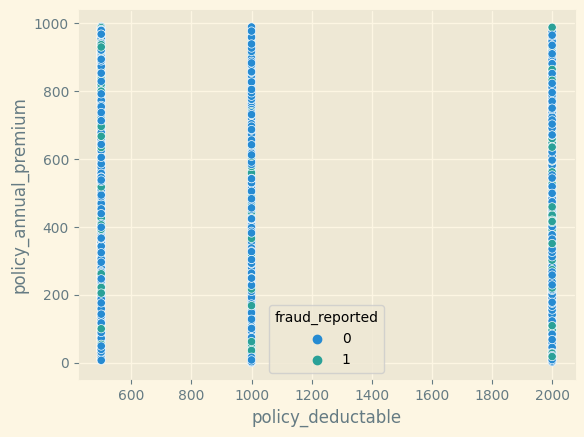

In [75]:
sns.scatterplot(x = "policy_deductable", y = "policy_annual_premium" ,hue='fraud_reported', data = df)
plt.show()

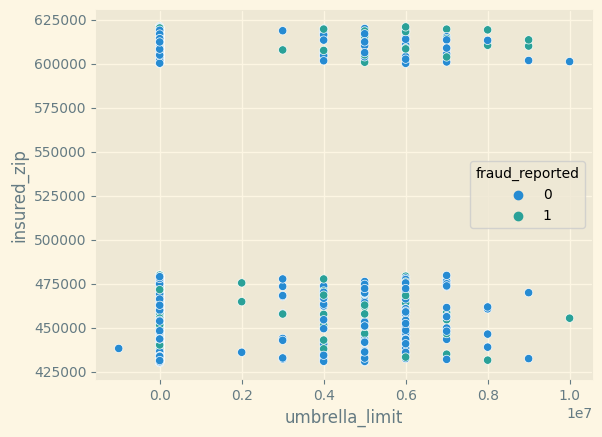

In [76]:
sns.scatterplot(x = "umbrella_limit", y = "insured_zip" ,hue='fraud_reported', data = df)
plt.show()

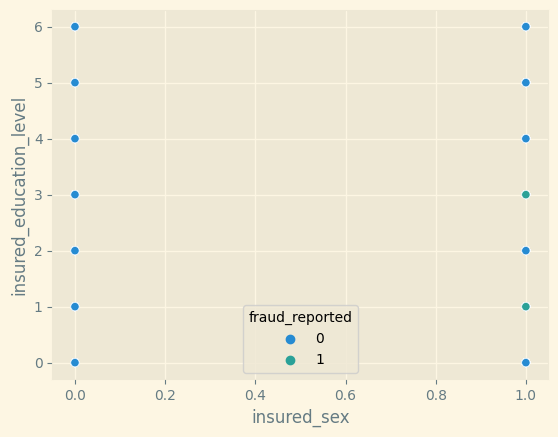

In [77]:
sns.scatterplot(x = "insured_sex", y = "insured_education_level" ,hue='fraud_reported', data = df)
plt.show()

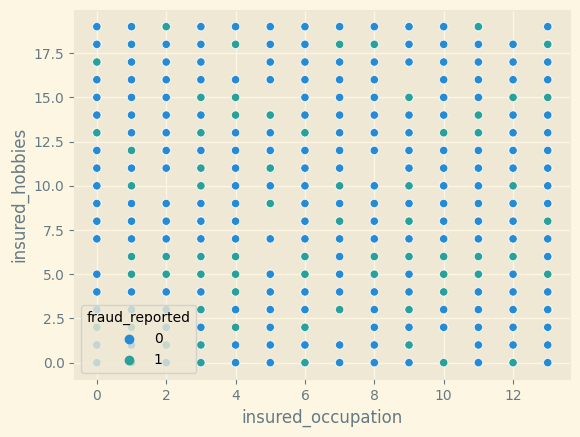

In [78]:
sns.scatterplot(x = "insured_occupation", y = "insured_hobbies" ,hue='fraud_reported', data = df)
plt.show()

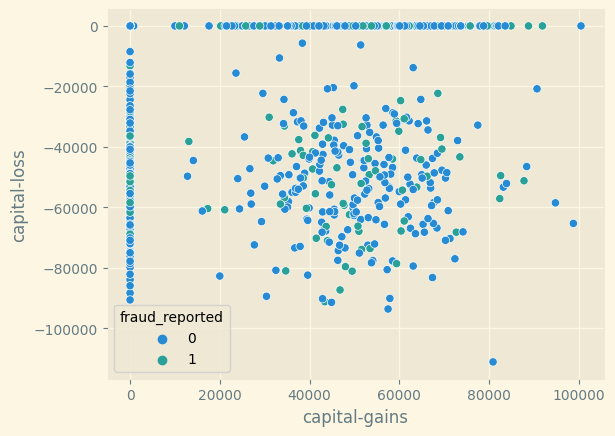

In [79]:
sns.scatterplot(x = "capital-gains", y = "capital-loss" ,hue='fraud_reported', data = df)
plt.show()

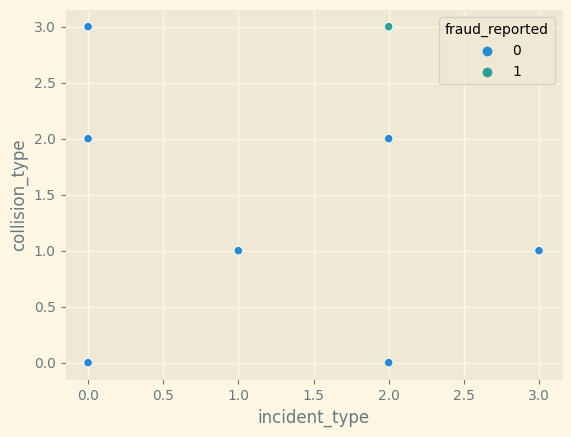

In [80]:
sns.scatterplot(x = "incident_type", y = "collision_type" ,hue='fraud_reported', data = df)
plt.show()

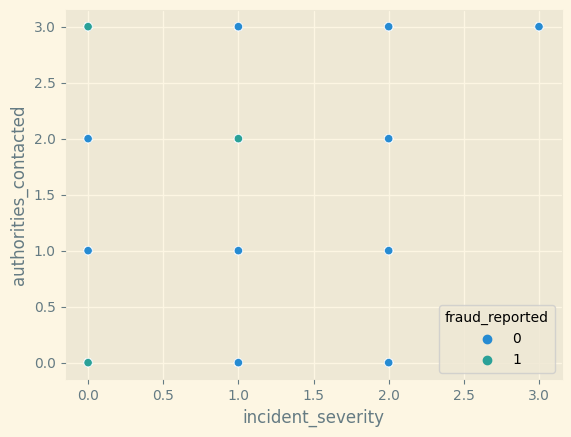

In [81]:
sns.scatterplot(x = "incident_severity", y = "authorities_contacted" ,hue='fraud_reported', data = df)
plt.show()

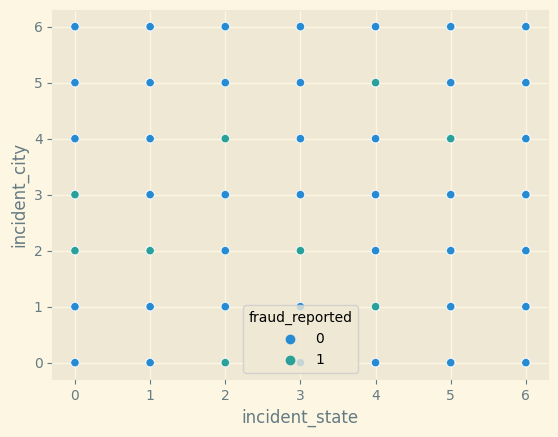

In [82]:
sns.scatterplot(x = "incident_state", y = "incident_city" ,hue='fraud_reported', data = df)
plt.show()

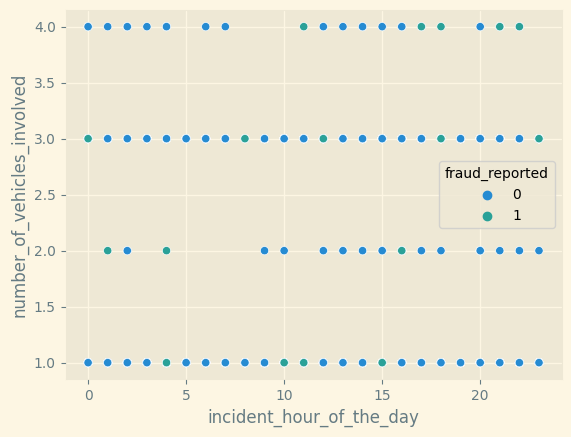

In [83]:
sns.scatterplot(x = "incident_hour_of_the_day", y = "number_of_vehicles_involved" ,hue='fraud_reported', data = df)
plt.show()

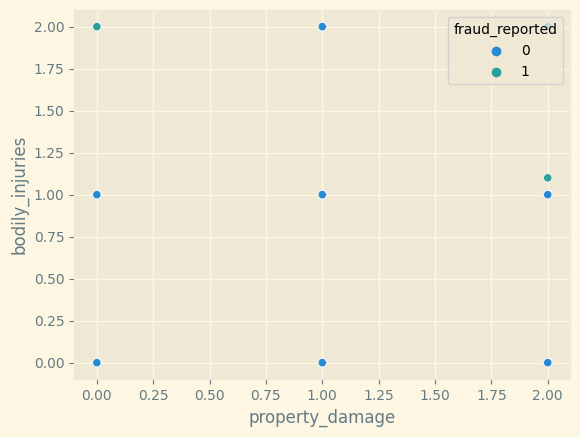

In [84]:
sns.scatterplot(x = "property_damage", y = "bodily_injuries" ,hue='fraud_reported', data = df)
plt.show()

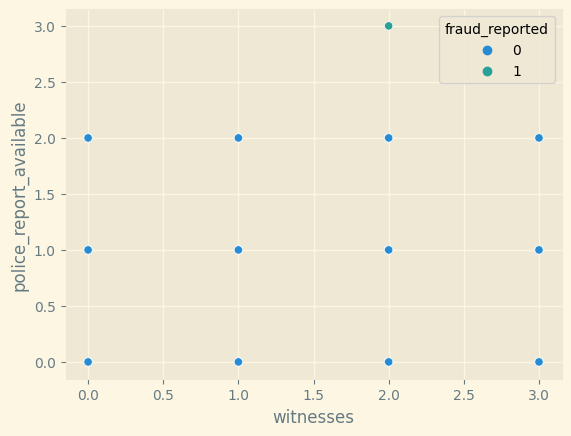

In [85]:
sns.scatterplot(x = "witnesses", y = "police_report_available" ,hue='fraud_reported', data = df)
plt.show()

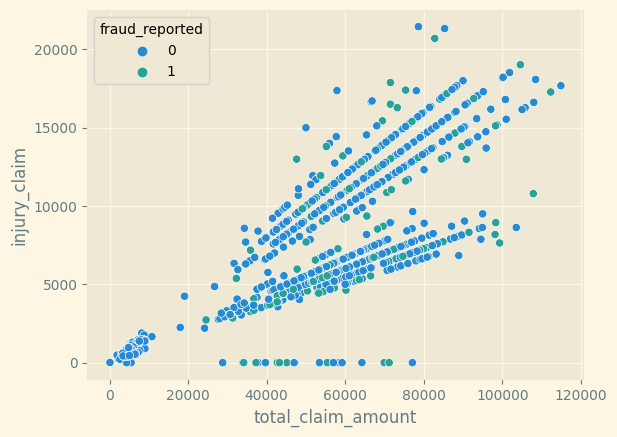

In [86]:
sns.scatterplot(x = "total_claim_amount", y = "injury_claim" ,hue='fraud_reported', data = df)
plt.show()

## Barplot

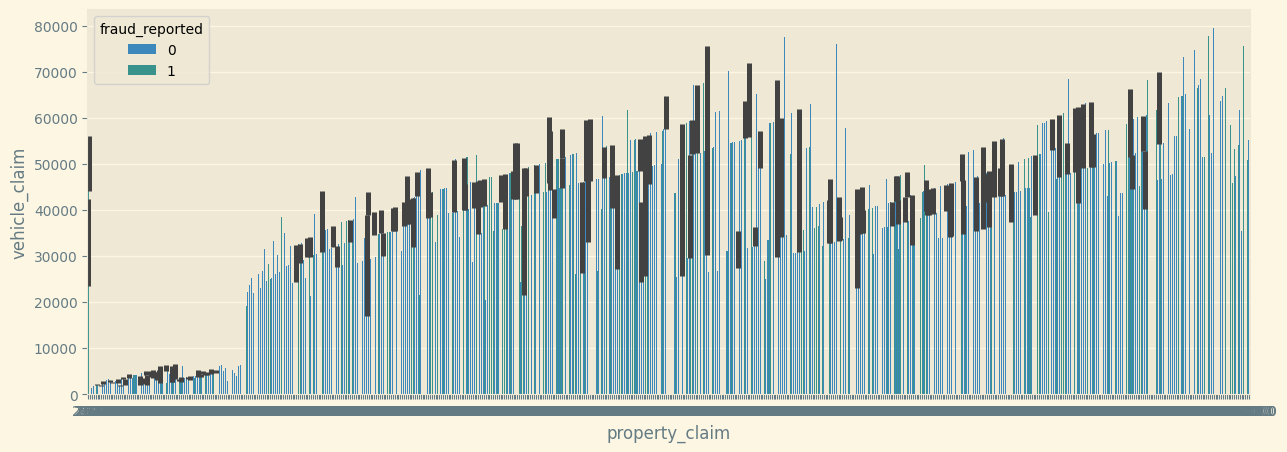

In [87]:
plt.figure(figsize = (15,5))
sns.barplot(x = "property_claim", y = "vehicle_claim", data = df ,hue='fraud_reported')
plt.show()

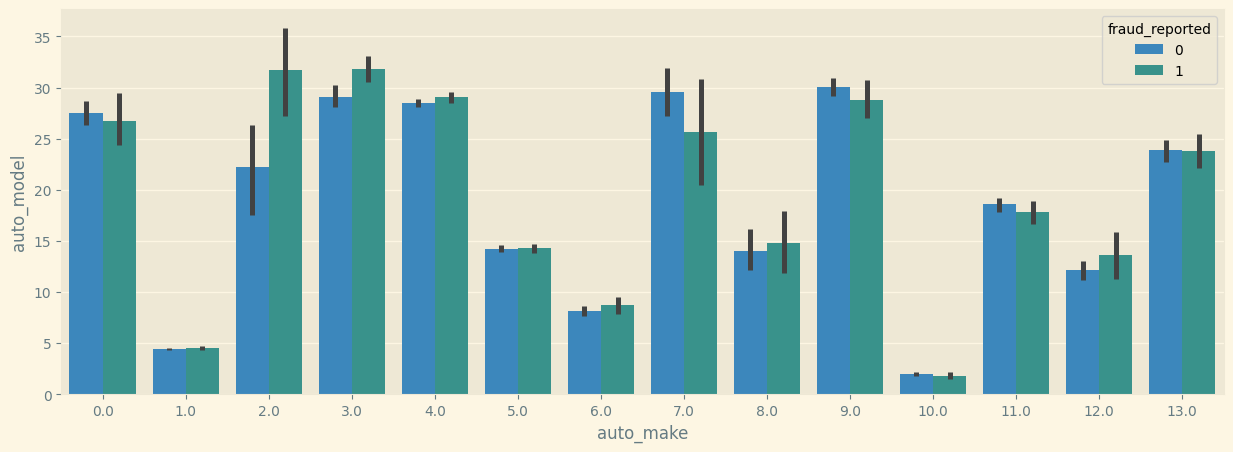

In [88]:
plt.figure(figsize = (15,5))
sns.barplot(x = "auto_make", y = "auto_model", data = df ,hue='fraud_reported')
plt.show()

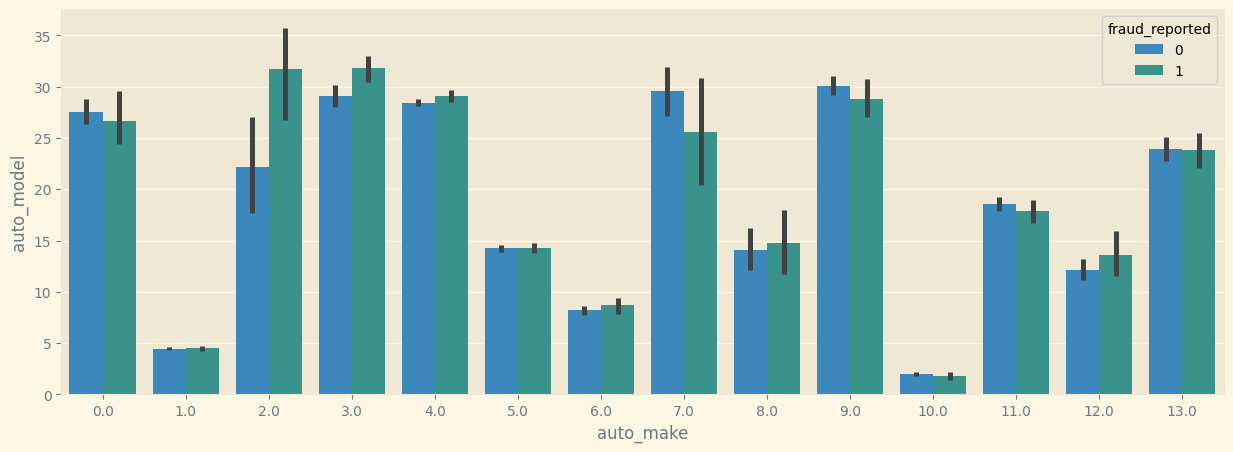

In [89]:
plt.figure(figsize = (15,5))
sns.barplot(x = "auto_make", y = "auto_model", data = df ,hue='fraud_reported')
plt.show()

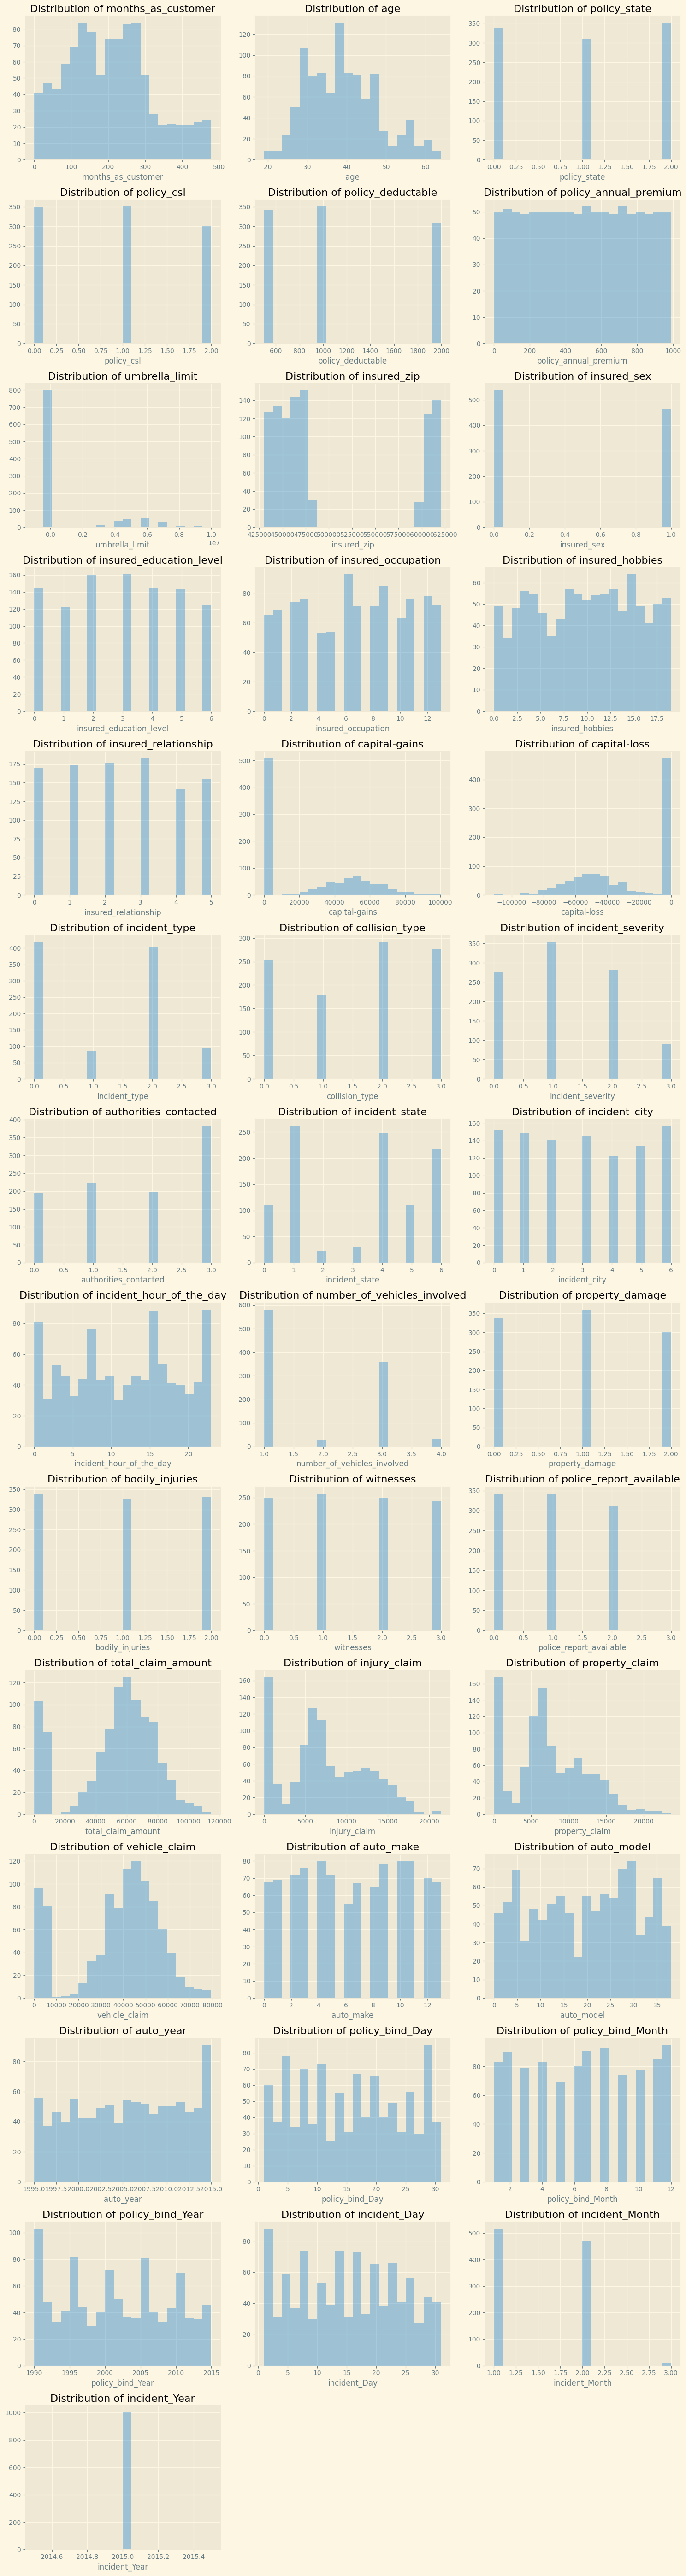

In [90]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3) 
plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.distplot(df[column], kde=False, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Histogram

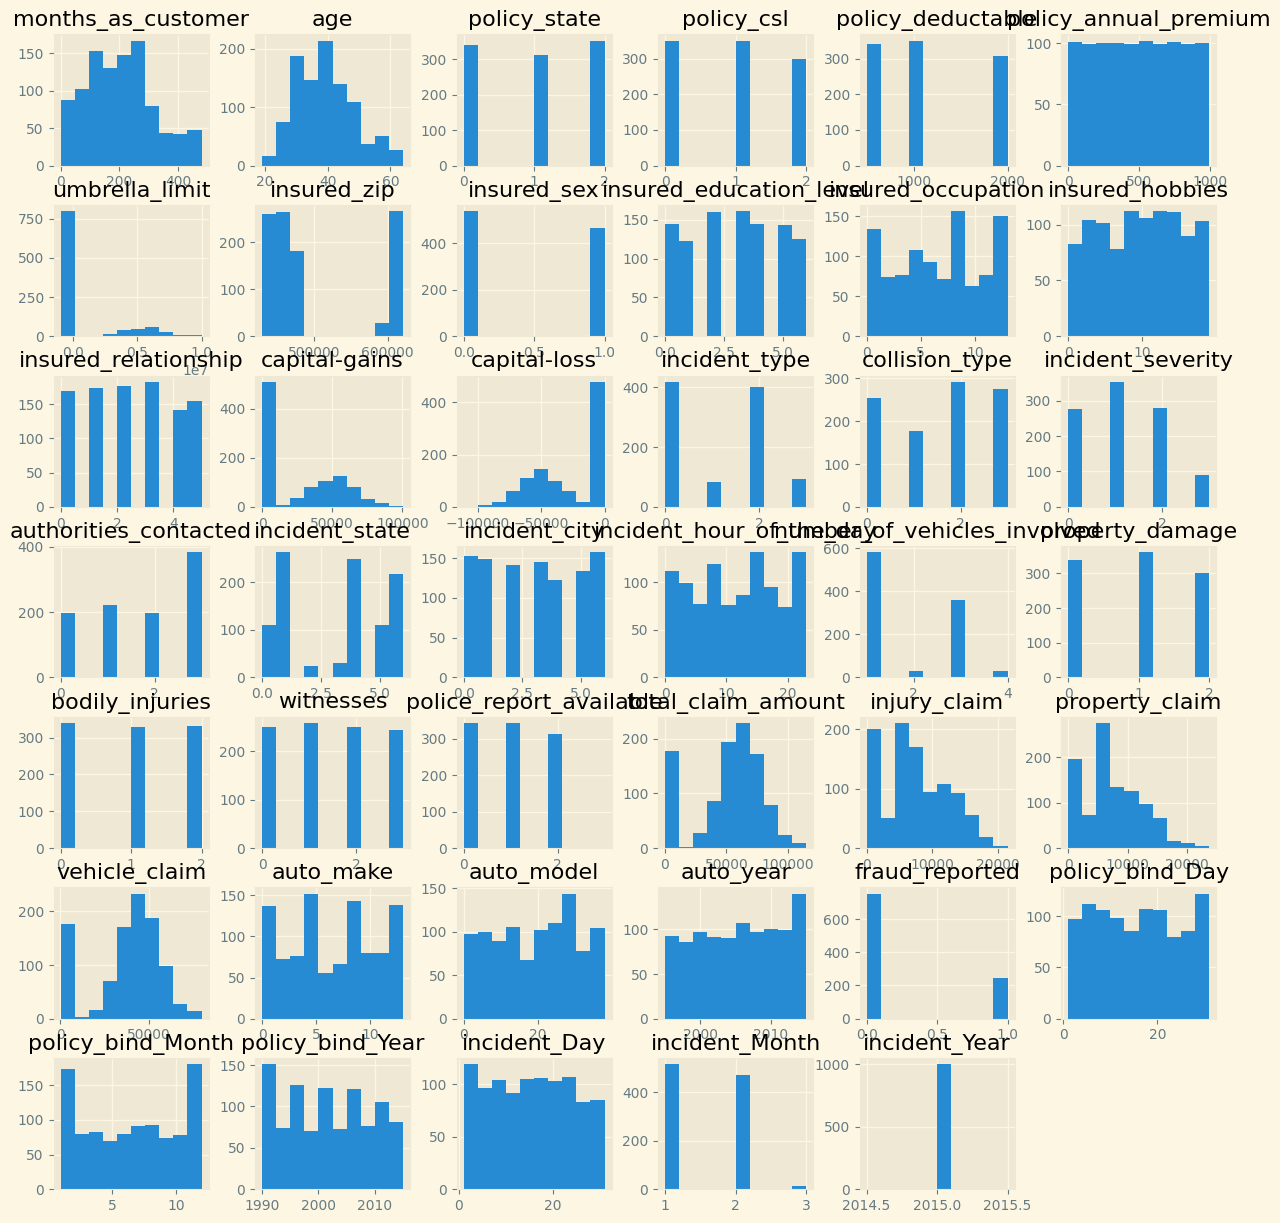

In [91]:
df.hist(figsize=(15,15))
plt.show()

## Seperating Label "Y" and Features "X"

In [92]:
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [93]:
y.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

The value count of our target variable is imbalanced, we will now oversample it by using smote

In [94]:
import imblearn

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [95]:
y.value_counts()

fraud_reported
1    753
0    753
Name: count, dtype: int64

Now our data is balanced in our target column.

## Feature Scaling

In [96]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.134583  1.057162      1.227063    0.101368          -0.238620   
1            0.214614  0.364849     -0.047855    0.101368           1.468321   
2           -0.650157 -1.135162      1.227063   -1.231022           1.468321   
3            0.472205  0.249464     -1.322774    0.101368           1.468321   
4            0.214614  0.595620     -1.322774    1.433758          -0.238620   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.297615       -0.509141    -0.481691     1.151444   
1              -0.952332        1.626410    -0.452441     1.151444   
2               0.327376        1.626410    -0.989686    -0.993166   
3               0.338536        2.053521     1.550077    -0.993166   
4               0.930029        2.053521     1.587125     1.151444   

   insured_education_level  ...  vehicle_claim  auto_make  auto_model  \
0                 0.562041  ...       0.692814   0.934938   -1.727935   
1                 0.562041  ...      -2.137431   0.409063   -0.679189   
2                 1.644708  ...      -0.995893  -0.642688    1.036940   
3                 1.644708  ...       0.613564  -0.905625    1.418302   
4                -1.603293  ...      -2.076828  -1.694438    1.132280   

   auto_year  policy_bind_Day  policy_bind_Month  policy_bind_Year  \
0  -0.205723         0.171443           1.132445          1.797286   
1   0.322041         1.366786          -0.101385          0.640200   
2   0.322041        -1.143433           0.823987         -0.227614   
3   1.553491         1.127717          -0.409843         -1.673971   
4   0.673884        -1.143433          -0.101385          1.797286   

   incident_Day  incident_Month  incident_Year  
0      1.282060       -0.793550            0.0  
1      0.792883       -0.793550            0.0  
2      0.915177        1.181799            0.0  
3     -0.552354       -0.793550            0.0  
4      0.303706        1.181799            0.0  

[5 rows x 40 columns]

## Checking VIF(Variance Inflation Factor) values:

In [97]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

VIF values                     Features
0     7.392035           months_as_customer
1     7.379376                          age
2     1.044010                 policy_state
3     1.035934                   policy_csl
4     1.068080            policy_deductable
5     1.048629        policy_annual_premium
6     1.053839               umbrella_limit
7     1.051224                  insured_zip
8     1.044321                  insured_sex
9     1.063987      insured_education_level
10    1.043856           insured_occupation
11    1.066808              insured_hobbies
12    1.078921         insured_relationship
13    1.054435                capital-gains
14    1.065603                 capital-loss
15    5.736628                incident_type
16    1.094649               collision_type
17    1.236839            incident_severity
18    1.220576        authorities_contacted
19    1.053328               incident_state
20    1.045252                incident_city
21    1.116433     incident_hour_of_the_day
22    5.669359  number_of_vehicles_involved
23    1.050624              property_damage
24    1.036671              bodily_injuries
25    1.058978                    witnesses
26    1.066159      police_report_available
27         inf           total_claim_amount
28         inf                 injury_claim
29         inf               property_claim
30         inf                vehicle_claim
31    1.087372                    auto_make
32    1.077792                   auto_model
33    1.052648                    auto_year
34    1.041501              policy_bind_Day
35    1.054834            policy_bind_Month
36    1.045494             policy_bind_Year
37    1.067641                 incident_Day
38    1.098918               incident_Month
39         NaN                incident_Year

We can see that all columns have VIF values less than 10 so we can proceed.

In [100]:
max_accuracy = 0
best_random_state = 0
best_test_size = 0

#Define a list of test sizes to iterate over
test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        pred = lr.predict(x_test)
        accuracy = accuracy_score(y_test, pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = random_state
            best_test_size = test_size

print("Best accuracy score is", max_accuracy, "on Random State", best_random_state, "with Test Size", best_test_size)


Best accuracy score is 0.8049242424242424 on Random State 755 with Test Size 0.35


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=515)

In [102]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (1204, 40)
y_train shape: (1204,)
x_test shape: (302, 40)
y_test.shape: (302,)


## LogisticRegression


In [103]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_LR = LogisticRegression(**best_params)

best_LR.fit(x_train, y_train)

predLR = best_LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8145695364238411

Confusion Matrix:
 [[131   8]
 [ 48 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       139
           1       0.93      0.71      0.80       163

    accuracy                           0.81       302
   macro avg       0.83      0.82      0.81       302
weighted avg       0.84      0.81      0.81       302



Accuracy: 0.8145695364238411

Confusion Matrix:
 [[131   8]
 [ 48 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       139
           1       0.93      0.71      0.80       163

    accuracy                           0.81       302
   macro avg       0.83      0.82      0.81       302
weighted avg       0.84      0.81      0.81       302



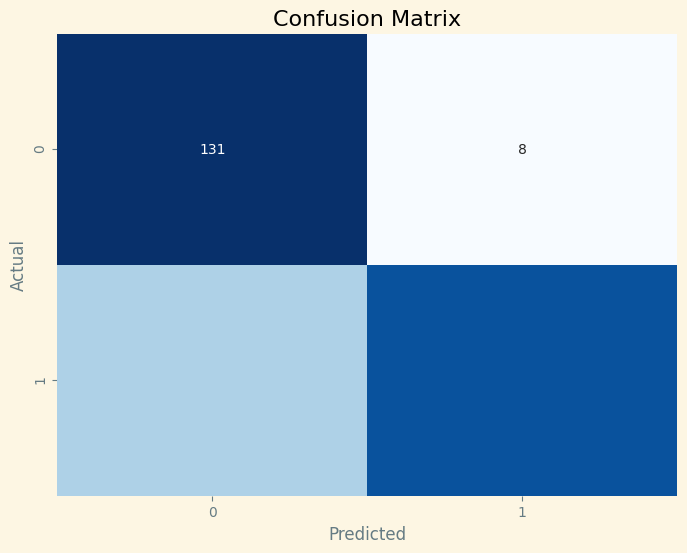

In [104]:
LR = LogisticRegression(C=0.01, penalty="l1", solver="liblinear")
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## RandomForestClassifier

In [105]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}
Test Accuracy: 0.9271523178807947


Accuracy: 0.9337748344370861
Confusion Matrix:
 [[133   6]
 [ 14 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       139
           1       0.96      0.91      0.94       163

    accuracy                           0.93       302
   macro avg       0.93      0.94      0.93       302
weighted avg       0.94      0.93      0.93       302



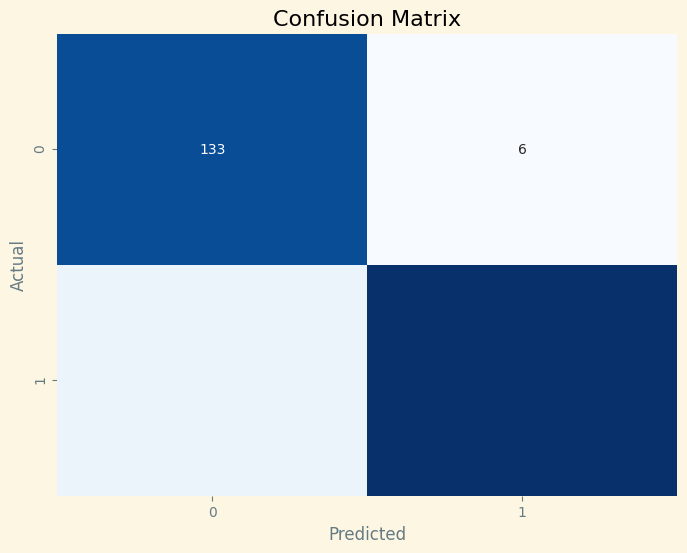

In [106]:
RFC = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=15)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Support vector classifier

Accuracy: 0.9039735099337748
Confusion Matrix:
 [[122  17]
 [ 12 151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       139
           1       0.90      0.93      0.91       163

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



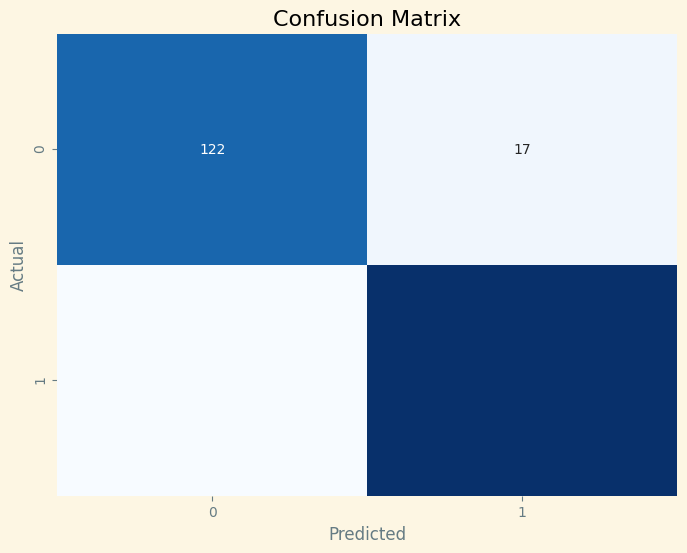

In [107]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=42)
svc_rbf.fit(x_train, y_train)

predsvc_rbf = svc_rbf.predict(x_test)

accuracy = accuracy_score(y_test, predsvc_rbf)
conf_matrix = confusion_matrix(y_test, predsvc_rbf)
class_report = classification_report(y_test, predsvc_rbf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier


In [108]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}
Test Accuracy: 0.8543046357615894


Accuracy: 0.8377483443708609
Confusion Matrix:
 [[115  24]
 [ 25 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.85      0.85      0.85       163

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



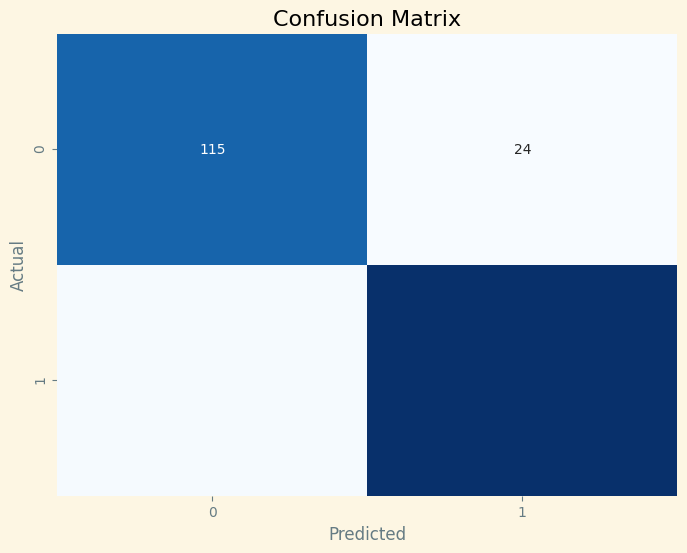

In [109]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = 20, min_samples_split=5, min_samples_leaf=2)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_test, pred_dtc)
conf_matrix = confusion_matrix(y_test, pred_dtc)
class_report = classification_report(y_test, pred_dtc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier

In [110]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}
Test Accuracy: 0.9437086092715232


Accuracy: 0.9403973509933775
Confusion Matrix:
 [[130   9]
 [  9 154]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       139
           1       0.94      0.94      0.94       163

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



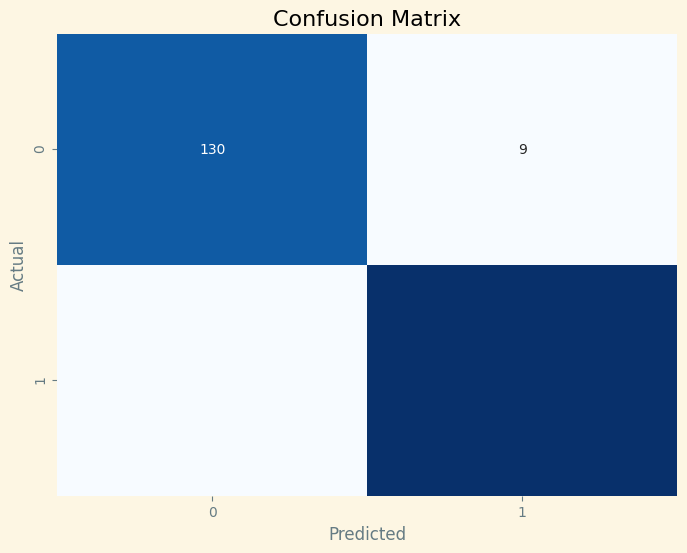

In [111]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='entropy',max_depth=None,min_samples_split=2,min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

accuracy = accuracy_score(y_test, pred_EXC)
conf_matrix = confusion_matrix(y_test, pred_EXC)
class_report = classification_report(y_test, pred_EXC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 ## GradientBoostingClassifier


In [112]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
Test Accuracy: 0.9337748344370861


Accuracy: 0.9271523178807947
Confusion Matrix:
 [[127  12]
 [ 10 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       139
           1       0.93      0.94      0.93       163

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



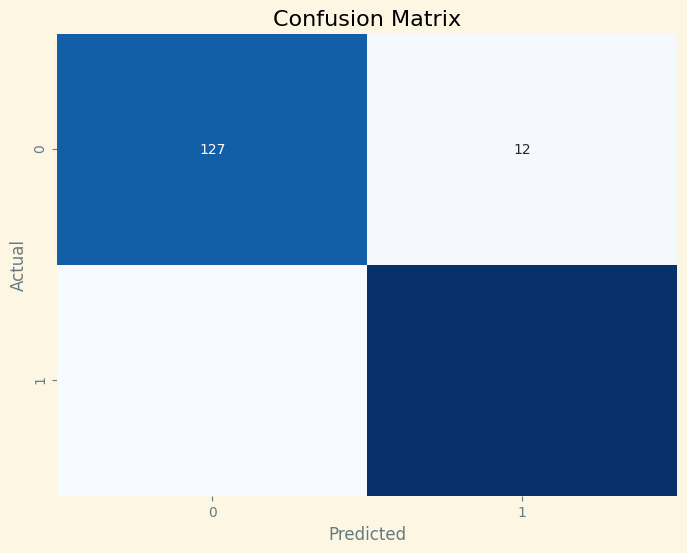

In [114]:
GBC = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

accuracy = accuracy_score(y_test, pred_GBC)
conf_matrix = confusion_matrix(y_test, pred_GBC)
class_report = classification_report(y_test, pred_GBC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [115]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'learning_rate': 0.5}
Test Accuracy: 0.9271523178807947


Accuracy: 0.9271523178807947
Confusion Matrix:
 [[130   9]
 [ 13 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       139
           1       0.94      0.92      0.93       163

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



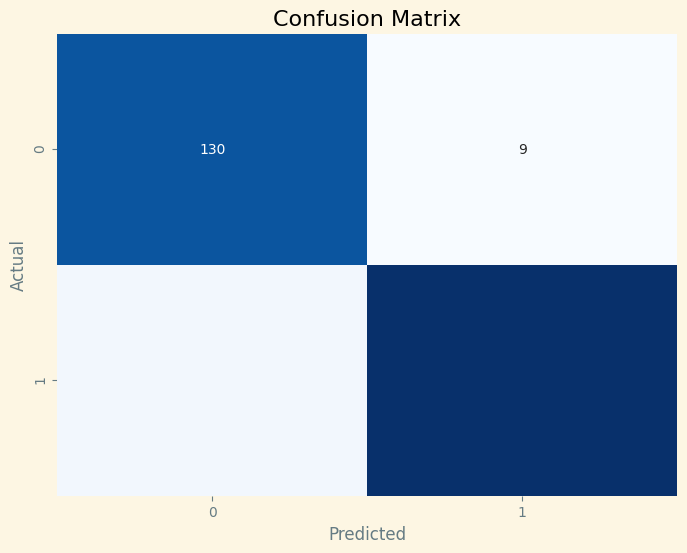

In [116]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
ABC.fit(x_train, y_train)

pred_ABC = ABC.predict(x_test)

accuracy = accuracy_score(y_test, pred_ABC)
conf_matrix = confusion_matrix(y_test, pred_ABC)
class_report = classification_report(y_test, pred_ABC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier work better

## Cross Validation Score

In [117]:
score = cross_val_score(EXC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, pred_EXC) - score.mean())

[0.81456954 0.86046512 0.94352159 0.95681063 0.95348837]
0.9057710501419111
0.03462630085146645


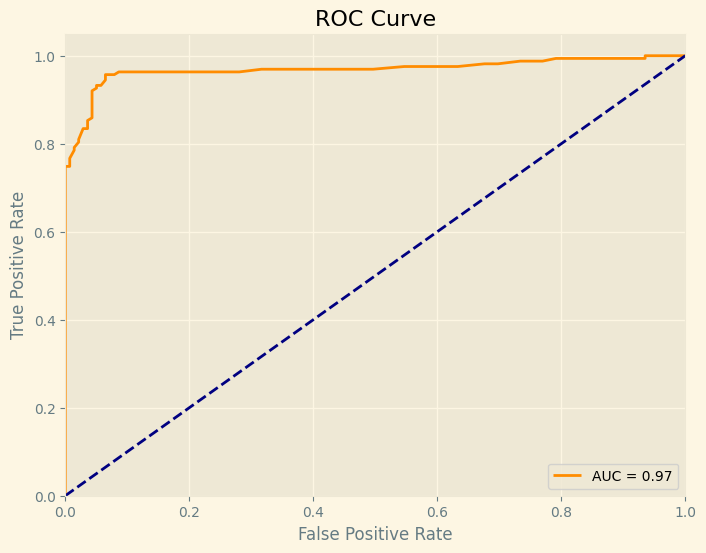

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_probs = EXC.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Auc gives 98%

In [120]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': pred_EXC})
values.sample(10)

Actual  Predicted
616        1          1
304        0          0
91         1          1
1252       1          1
1021       1          1
1064       1          1
1486       1          1
1294       1          1
562        0          0
996        0          1

## Model works perfect so we save this model

In [121]:
# Save the model as a objectfile
import joblib

joblib.dump(EXC,'Insurance_Claim_Fraud_Detection')

['Insurance_Claim_Fraud_Detection']

In [122]:
model=joblib.load(open("Insurance_Claim_Fraud_Detection","rb"))
model

ExtraTreesClassifier(criterion='entropy')